In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.grid_search

In [4]:
df = pd.read_csv('/content/drive/MyDrive/PAYTM_MLE/PAYTM_take_home_assign/train.csv')
test = pd.read_csv('/content/drive/MyDrive/PAYTM_MLE/PAYTM_take_home_assign/test.csv')

In [5]:
test.head()

Tern     Thrush      Tick Tiger Tiglon Toad   Tortoise  \
0   10037.569173 -49.659246 -1.136071     s  False    l -26.668479   
1  309793.427988 -49.659246 -0.405625     s    NaN    s  -9.135203   
2 -211799.890072 -49.659246 -1.264768     s    NaN    s -33.497916   
3  126491.946464 -49.659246 -0.657188     s    NaN    s -13.408124   
4 -263898.558134 -49.659246 -0.806868     s    NaN    l -16.425848   

        Trout          Tuna        Turkey  ...  Weasel         Whale  \
0 -416.498726 -68609.347455  9.545921e+04  ...       b -1.654323e+06   
1 -504.070169 -39477.100060  1.993753e+06  ...       a -3.070990e+06   
2 -369.689046  -8971.914423  5.490111e+04  ...       b  2.571013e+05   
3 -474.511672  -2781.100939  1.906031e+05  ...       a -3.562542e+06   
4 -426.317969 -43766.391718  1.533545e+05  ...       b -1.329357e+06   

    Whippet     Whitefish     Wildcat  Wildebeest Wildfowl  Wolf  Wolverine  \
0 -1.342072 -3.528056e+07   64.911670   -0.314766        b    m1          x   
1 -1.340854 -3.528065e+07  -12.327810    0.836566        b    s1          r   
2 -1.305239 -3.528212e+07  -65.275581    0.405433        b    k1          x   
3 -1.295844 -3.527862e+07 -131.275734    0.076052        b    s1          s   
4 -1.341364 -3.528261e+07  389.990411   -0.341824        b    k1          m   

   target  
0       0  
1       0  
2       0  
3       1  
4       1  

[5 rows x 31 columns]

In [6]:
test.shape

(1031, 31)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tern           1031 non-null   float64
 1   Thrush         1031 non-null   float64
 2   Tick           1031 non-null   float64
 3   Tiger          1031 non-null   object 
 4   Tiglon         516 non-null    object 
 5   Toad           1031 non-null   object 
 6   Tortoise       1031 non-null   float64
 7   Trout          1031 non-null   float64
 8   Tuna           1031 non-null   float64
 9   Turkey         1031 non-null   float64
 10  Turtle         1031 non-null   float64
 11  Tyrannosaurus  1031 non-null   float64
 12  Urial          1031 non-null   object 
 13  Vicuna         0 non-null      float64
 14  Viper          1031 non-null   float64
 15  Vole           1031 non-null   float64
 16  Vulture        1031 non-null   object 
 17  Wallaby        485 non-null    float64
 18  Walrus  

In [8]:
((test.isna().sum())/1031)*100

Tern               0.000000
Thrush             0.000000
Tick               0.000000
Tiger              0.000000
Tiglon            49.951503
Toad               0.000000
Tortoise           0.000000
Trout              0.000000
Tuna               0.000000
Turkey             0.000000
Turtle             0.000000
Tyrannosaurus      0.000000
Urial              0.000000
Vicuna           100.000000
Viper              0.000000
Vole               0.000000
Vulture            0.000000
Wallaby           52.958293
Walrus             0.000000
Wasp               0.000000
Warbler            0.000000
Weasel             0.000000
Whale              0.000000
Whippet            0.000000
Whitefish          0.000000
Wildcat            0.000000
Wildebeest         0.000000
Wildfowl           0.000000
Wolf               0.000000
Wolverine          0.000000
target             0.000000
dtype: float64

In [9]:
test.drop("Vicuna", axis = 1, inplace = True)
test.drop("Tiglon", axis = 1, inplace = True)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tern           1031 non-null   float64
 1   Thrush         1031 non-null   float64
 2   Tick           1031 non-null   float64
 3   Tiger          1031 non-null   object 
 4   Toad           1031 non-null   object 
 5   Tortoise       1031 non-null   float64
 6   Trout          1031 non-null   float64
 7   Tuna           1031 non-null   float64
 8   Turkey         1031 non-null   float64
 9   Turtle         1031 non-null   float64
 10  Tyrannosaurus  1031 non-null   float64
 11  Urial          1031 non-null   object 
 12  Viper          1031 non-null   float64
 13  Vole           1031 non-null   float64
 14  Vulture        1031 non-null   object 
 15  Wallaby        485 non-null    float64
 16  Walrus         1031 non-null   float64
 17  Wasp           1031 non-null   int64  
 18  Warbler 

In [11]:
df.head()

Tern     Thrush      Tick Tiger Tiglon Toad   Tortoise  \
0 -253077.772390 -49.659246 -0.679765     s    NaN    l -12.055165   
1  380192.123132 -49.659246 -1.356456     s  False    l -30.235998   
2 -218627.876963 -49.659246 -0.542194     s  False    l -10.443575   
3 -178076.879466 -49.659246 -0.485974     s    NaN    l  -8.374563   
4 -169250.190006 -49.659246 -0.600561     s  False    l -10.269902   

        Trout          Tuna        Turkey  ...  Weasel         Whale  \
0 -463.332642 -41860.419322  3.256739e+05  ...       a -3.297065e+06   
1 -388.822813 -94810.029959  1.154421e+03  ...       b -1.043690e+06   
2 -519.014942 -46075.931683  2.248867e+06  ...       a  4.892868e+06   
3 -504.614247 -73554.391505  1.452062e+07  ...       a  2.814345e+07   
4 -455.225099 -41390.990681  2.689196e+05  ...       a -1.801627e+05   

    Whippet     Whitefish      Wildcat  Wildebeest Wildfowl  Wolf  Wolverine  \
0 -0.974495 -3.536578e+07  -395.159010    0.021952        b    k1          m   
1 -1.342061 -3.536549e+07   609.332121    0.269383        b    m1          x   
2 -1.335934 -3.536456e+07  1175.536902    0.341417        b    s2          r   
3 -1.073553 -3.536497e+07  -359.320759    0.003191        m    k1          w   
4 -1.341853 -3.536321e+07  -346.856580   -0.250332        b    j1          s   

   target  
0       1  
1       0  
2       0  
3       0  
4       0  

[5 rows x 31 columns]

In [12]:
df.head()

Tern     Thrush      Tick Tiger Tiglon Toad   Tortoise  \
0 -253077.772390 -49.659246 -0.679765     s    NaN    l -12.055165   
1  380192.123132 -49.659246 -1.356456     s  False    l -30.235998   
2 -218627.876963 -49.659246 -0.542194     s  False    l -10.443575   
3 -178076.879466 -49.659246 -0.485974     s    NaN    l  -8.374563   
4 -169250.190006 -49.659246 -0.600561     s  False    l -10.269902   

        Trout          Tuna        Turkey  ...  Weasel         Whale  \
0 -463.332642 -41860.419322  3.256739e+05  ...       a -3.297065e+06   
1 -388.822813 -94810.029959  1.154421e+03  ...       b -1.043690e+06   
2 -519.014942 -46075.931683  2.248867e+06  ...       a  4.892868e+06   
3 -504.614247 -73554.391505  1.452062e+07  ...       a  2.814345e+07   
4 -455.225099 -41390.990681  2.689196e+05  ...       a -1.801627e+05   

    Whippet     Whitefish      Wildcat  Wildebeest Wildfowl  Wolf  Wolverine  \
0 -0.974495 -3.536578e+07  -395.159010    0.021952        b    k1          m   
1 -1.342061 -3.536549e+07   609.332121    0.269383        b    m1          x   
2 -1.335934 -3.536456e+07  1175.536902    0.341417        b    s2          r   
3 -1.073553 -3.536497e+07  -359.320759    0.003191        m    k1          w   
4 -1.341853 -3.536321e+07  -346.856580   -0.250332        b    j1          s   

   target  
0       1  
1       0  
2       0  
3       0  
4       0  

[5 rows x 31 columns]

**Copying the data.**

In [13]:
data = df.copy()

Shape of the raw data: Number of data points(rows) and number of features(columns).

In [14]:
data.shape

(7003, 31)

**Exploratory Data Analysis: Data information, Analysis, Visualization**

Information about the data.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tern           7003 non-null   float64
 1   Thrush         7003 non-null   float64
 2   Tick           7003 non-null   float64
 3   Tiger          7003 non-null   object 
 4   Tiglon         3617 non-null   object 
 5   Toad           7003 non-null   object 
 6   Tortoise       7003 non-null   float64
 7   Trout          7003 non-null   float64
 8   Tuna           7003 non-null   float64
 9   Turkey         7003 non-null   float64
 10  Turtle         7003 non-null   float64
 11  Tyrannosaurus  7003 non-null   float64
 12  Urial          7003 non-null   object 
 13  Vicuna         0 non-null      float64
 14  Viper          7003 non-null   float64
 15  Vole           7003 non-null   float64
 16  Vulture        7003 non-null   object 
 17  Wallaby        3471 non-null   float64
 18  Walrus  

**Percentage of Missing values**

In [16]:
((data.isna().sum())/7003)*100

Tern               0.000000
Thrush             0.000000
Tick               0.000000
Tiger              0.000000
Tiglon            48.350707
Toad               0.000000
Tortoise           0.000000
Trout              0.000000
Tuna               0.000000
Turkey             0.000000
Turtle             0.000000
Tyrannosaurus      0.000000
Urial              0.000000
Vicuna           100.000000
Viper              0.000000
Vole               0.000000
Vulture            0.000000
Wallaby           50.435528
Walrus             0.000000
Wasp               0.000000
Warbler            0.000000
Weasel             0.000000
Whale              0.000000
Whippet            0.000000
Whitefish          0.000000
Wildcat            0.000000
Wildebeest         0.000000
Wildfowl           0.000000
Wolf               0.000000
Wolverine          0.000000
target             0.000000
dtype: float64

**Dropping the columns "Tiglon and Vicuna, We see that Vicuna has 100% missing data and Tiglon has only info stating "False" rest data is unknown in Tiglon feature so removing them.**

In [17]:
data.drop("Vicuna", axis = 1, inplace = True)
data.drop("Tiglon", axis = 1, inplace = True)

In [18]:
data

Tern     Thrush      Tick Tiger Toad   Tortoise       Trout  \
0    -253077.772390 -49.659246 -0.679765     s    l -12.055165 -463.332642   
1     380192.123132 -49.659246 -1.356456     s    l -30.235998 -388.822813   
2    -218627.876963 -49.659246 -0.542194     s    l -10.443575 -519.014942   
3    -178076.879466 -49.659246 -0.485974     s    l  -8.374563 -504.614247   
4    -169250.190006 -49.659246 -0.600561     s    l -10.269902 -455.225099   
...             ...        ...       ...   ...  ...        ...         ...   
6998 -246840.700218 -49.659246 -1.180932     s    l -25.887398 -397.556639   
6999  -32731.429095 -49.659246 -0.355033     s    l  -6.157721 -504.683096   
7000  -73991.670435 -49.659246 -0.868682     s    l -16.315083 -463.735452   
7001 -278624.327833 -16.772943 -0.675340     s    u -11.704156 -472.480093   
7002  332644.018190 -49.659246 -1.349087     s    l -28.280392 -364.077479   

              Tuna        Turkey        Turtle  ...  Weasel         Whale  \
0    -41860.419322  3.256739e+05 -4.542838e+11  ...       a -3.297065e+06   
1    -94810.029959  1.154421e+03 -3.356728e+12  ...       b -1.043690e+06   
2    -46075.931683  2.248867e+06 -1.671217e+11  ...       a  4.892868e+06   
3    -73554.391505  1.452062e+07 -1.832696e+14  ...       a  2.814345e+07   
4    -41390.990681  2.689196e+05 -5.327237e+17  ...       a -1.801627e+05   
...            ...           ...           ...  ...     ...           ...   
6998 -93903.183437  7.822274e+04 -1.671217e+11  ...       b  4.398786e+05   
6999 -86026.110161  3.389865e+06 -4.542838e+11  ...       a  1.224437e+07   
7000 -96302.545530  9.704820e+04 -2.716614e+16  ...       a  2.453862e+06   
7001 -41097.931591  9.764238e+05 -1.384571e+18  ...       a -6.285754e+06   
7002 -82717.822374  7.286965e+04 -5.327237e+17  ...       b  5.038175e+05   

       Whippet     Whitefish      Wildcat  Wildebeest  Wildfowl  Wolf  \
0    -0.974495 -3.536578e+07  -395.159010    0.021952         b    k1   
1    -1.342061 -3.536549e+07   609.332121    0.269383         b    m1   
2    -1.335934 -3.536456e+07  1175.536902    0.341417         b    s2   
3    -1.073553 -3.536497e+07  -359.320759    0.003191         m    k1   
4    -1.341853 -3.536321e+07  -346.856580   -0.250332         b    j1   
...        ...           ...          ...         ...       ...   ...   
6998 -1.342072 -3.536359e+07   159.699665   -0.294403         b    r2   
6999 -1.342072 -3.536138e+07   163.732671   -0.379221         b    s1   
7000 -1.305983 -3.536540e+07  -172.033458    0.150357         b    e2   
7001 -1.342015 -3.536361e+07   -67.920425   -0.030202         b    r2   
7002 -1.315773 -3.536487e+07    11.781581    0.234827         b    z2   

     Wolverine target  
0            m      1  
1            x      0  
2            r      0  
3            w      0  
4            s      0  
...        ...    ...  
6998         x      0  
6999         z      0  
7000         m      0  
7001         h      0  
7002         x      0  

[7003 rows x 29 columns]

In [19]:
data.head()

Tern     Thrush      Tick Tiger Toad   Tortoise       Trout  \
0 -253077.772390 -49.659246 -0.679765     s    l -12.055165 -463.332642   
1  380192.123132 -49.659246 -1.356456     s    l -30.235998 -388.822813   
2 -218627.876963 -49.659246 -0.542194     s    l -10.443575 -519.014942   
3 -178076.879466 -49.659246 -0.485974     s    l  -8.374563 -504.614247   
4 -169250.190006 -49.659246 -0.600561     s    l -10.269902 -455.225099   

           Tuna        Turkey        Turtle  ...  Weasel         Whale  \
0 -41860.419322  3.256739e+05 -4.542838e+11  ...       a -3.297065e+06   
1 -94810.029959  1.154421e+03 -3.356728e+12  ...       b -1.043690e+06   
2 -46075.931683  2.248867e+06 -1.671217e+11  ...       a  4.892868e+06   
3 -73554.391505  1.452062e+07 -1.832696e+14  ...       a  2.814345e+07   
4 -41390.990681  2.689196e+05 -5.327237e+17  ...       a -1.801627e+05   

    Whippet     Whitefish      Wildcat  Wildebeest  Wildfowl  Wolf Wolverine  \
0 -0.974495 -3.536578e+07  -395.159010    0.021952         b    k1         m   
1 -1.342061 -3.536549e+07   609.332121    0.269383         b    m1         x   
2 -1.335934 -3.536456e+07  1175.536902    0.341417         b    s2         r   
3 -1.073553 -3.536497e+07  -359.320759    0.003191         m    k1         w   
4 -1.341853 -3.536321e+07  -346.856580   -0.250332         b    j1         s   

  target  
0      1  
1      0  
2      0  
3      0  
4      0  

[5 rows x 29 columns]

In [20]:
data['Wallaby'].head(25)

0    -1.800251e+07
1              NaN
2              NaN
3              NaN
4              NaN
5    -1.490572e+07
6    -5.157540e+06
7    -1.870867e+07
8              NaN
9              NaN
10             NaN
11   -3.864473e+06
12             NaN
13   -8.896752e+06
14   -2.522648e+06
15             NaN
16             NaN
17             NaN
18             NaN
19   -1.902100e+07
20   -1.998151e+07
21             NaN
22             NaN
23   -9.576012e+06
24   -1.540415e+07
Name: Wallaby, dtype: float64

Statistical information of numerical features.

In [21]:
data.describe().T

count          mean           std           min           25%  \
Tern           7003.0 -6.456066e+04  1.753045e+05 -3.773245e+05 -1.947728e+05   
Thrush         7003.0 -4.502436e+01  1.437923e+01 -4.965925e+01 -4.965925e+01   
Tick           7003.0 -8.543213e-01  3.236843e-01 -1.383081e+00 -1.125735e+00   
Tortoise       7003.0 -1.680492e+01  7.274371e+00 -3.226648e+01 -2.248101e+01   
Trout          7003.0 -4.510483e+02  4.366830e+01 -5.765558e+02 -4.818227e+02   
Tuna           7003.0 -5.839114e+04  3.097722e+04 -9.630581e+04 -8.753545e+04   
Turkey         7003.0  8.274321e+05  1.869694e+06  0.000000e+00  7.603335e+04   
Turtle         7003.0 -2.018657e+17  6.117382e+17 -5.486601e+18 -7.368777e+16   
Tyrannosaurus  7003.0  6.208730e+01  3.381236e+00  4.783071e+01  6.018788e+01   
Viper          7003.0  1.688637e+04  3.815703e+04  0.000000e+00  1.551701e+03   
Vole           7003.0  5.367536e+06  2.189453e+07 -7.435038e+07 -5.831818e+06   
Wallaby        3471.0 -1.255097e+07  6.940075e+06 -2.308478e+07 -1.733438e+07   
Walrus         7003.0  6.284608e+04  4.706098e+04  2.265401e+00  2.776070e+04   
Wasp           7003.0  7.078337e-01  1.801767e+00 -1.800730e+00 -5.272874e-01   
Whale          7003.0  7.370826e+05  6.550392e+06 -1.012993e+07 -2.662170e+06   
Whippet        7003.0 -1.296473e+00  1.354539e-01 -1.342072e+00 -1.342072e+00   
Whitefish      7003.0 -3.536438e+07  1.117262e+03 -3.536665e+07 -3.536519e+07   
Wildcat        7003.0  6.030494e+02  1.485652e+03 -4.469402e+02 -1.872317e+02   
Wildebeest     7003.0  5.190221e-02  3.655973e-01 -6.624906e-01 -2.205199e-01   
target         7003.0  1.427959e-01  3.498896e-01  0.000000e+00  0.000000e+00   

                        50%           75%           max  
Tern          -9.007979e+04  3.554272e+04  8.707696e+05  
Thrush        -4.965925e+01 -4.965925e+01  0.000000e+00  
Tick          -8.825666e-01 -6.025404e-01 -4.028101e-02  
Tortoise      -1.684688e+01 -1.105008e+01 -3.010166e-02  
Trout         -4.457252e+02 -4.187758e+02 -3.438396e+02  
Tuna          -6.477931e+04 -3.098488e+04 -4.280253e-01  
Turkey         1.766421e+05  6.279989e+05  3.858295e+07  
Turtle        -6.742148e+13 -4.542838e+11 -2.261746e+10  
Tyrannosaurus  6.299537e+01  6.476389e+01  6.612547e+01  
Viper          3.604940e+03  1.281630e+04  7.874072e+05  
Vole           3.872861e+04  1.010235e+07  1.654868e+08  
Wallaby       -1.420595e+07 -9.509895e+06  4.228389e+07  
Walrus         5.327463e+04  8.430385e+04  3.364409e+05  
Wasp           2.672951e-01  1.370766e+00  1.117969e+01  
Whale         -1.046975e+06  1.889262e+06  4.783767e+07  
Whippet       -1.341861e+00 -1.328100e+00 -2.861439e-02  
Whitefish     -3.536452e+07 -3.536373e+07 -3.535816e+07  
Wildcat        7.251597e+01  7.699423e+02  1.780915e+04  
Wildebeest     2.617042e-03  2.722470e-01  2.051850e+00  
target         0.000000e+00  0.000000e+00  1.000000e+00

Statistical information of Categorical features.

In [22]:
data.describe(exclude = 'number').T

count unique top  freq
Tiger      7003      3   s  6456
Toad       7003      7   l  4137
Urial      7003      5   e  2588
Vulture    7003     40  b2   532
Warbler    7003     83  h4   366
Weasel     7003      2   b  3734
Wildfowl   7003     10   b  6544
Wolf       7003     28  k1  1913
Wolverine  7003     15   m  1874

Checking the count of each unique category in each of the categorical variables.

In [23]:
# Making a list of all categorical variables 
cat_col = ['Tiger', 'Toad', 'Urial', 'Vulture', 'Warbler', 'Weasel', 'Wildfowl','Wolf',
            'Wolverine', 'target']

# Printing number of count of each unique value in each column

for column in cat_col:
    print(data[column].value_counts())
    
    print('%' * 50)

    # print(test[column].value_counts())
    
    # print('-' * 50)

s    6456
v     521
e      26
Name: Tiger, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
l    4137
s    1476
u     799
z     355
w     178
i      48
o      10
Name: Toad, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
e    2588
a    1310
d    1151
c    1040
b     914
Name: Urial, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
b2    532
k1    529
e2    508
z2    502
x2    490
d1    467
p1    436
c1    403
o1    376
n2    331
y1    298
r1    295
j2    263
w1    230
v1    191
h2    188
a1    170
b1    151
a2    120
o2    116
m1     87
g2     61
t1     60
l1     59
f2     27
f1     23
x1     21
s2     17
i1     13
z1     11
l2      9
h1      6
i2      3
d2      3
u2      2
e1      1
q2      1
n1      1
t2      1
w2      1
Name: Vulture, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
h4    366
g1    333
o3    309
b1    287
e3    262
     ... 
p3      1
k4      1
f3      1
t3      1
h2      1
Name: Warbler, Length: 83, dtyp

Missing values treatment for Wallaby. Replacing the Nan values with the median of the column values.

In [24]:
data['Tiger'].replace(to_replace=['e'],value = np.NaN, inplace=True)

In [25]:
data['Toad'].replace(to_replace=['i','o'],value = np.NaN, inplace=True)

In [26]:
data['Vulture'].replace(to_replace=['l2','h1','i2','d2','u2','e1','q2','n1','t2','w2'],value = np.NaN, inplace=True)

In [27]:
data['Wildfowl'].replace(to_replace=['v','c','u','z'],value = np.NaN, inplace=True)

In [28]:
data['Wolf'].replace(to_replace=['k2','n1','c2','d2','p1','o1','v2','t1','y2'],value = np.NaN, inplace=True)

In [29]:
data['Wolverine'].replace(to_replace=['w','c','g'],value = np.NaN, inplace=True)

In [30]:
data['Warbler'].replace(to_replace=['k2','x2','e1','k4','e2','a4','t3','g4','m1','x3','s1','r2','f3','n1','a3','m4','z2','p3','t1','v2','e4','r1','x1','o2','d4','h2'],value = np.NaN, inplace=True)

In [31]:
data['Warbler']

0       f1
1       o4
2       g3
3       m3
4       h1
        ..
6998    p2
6999    n3
7000    k3
7001    o3
7002    g1
Name: Warbler, Length: 7003, dtype: object

In [32]:
print(data['Warbler'].value_counts())

h4    366
g1    333
o3    309
b1    287
e3    262
y2    261
p1    243
t4    241
b3    223
h1    222
y3    204
h3    199
g3    196
f1    193
l4    189
r3    188
u4    183
g2    182
n2    180
z4    178
w2    177
x4    175
q4    166
v4    163
o4    158
p2    156
r4    137
f4    134
c4    116
j3    101
k3     97
m3     62
j1     54
s3     51
i2     45
y4     41
l2     37
d2     36
l3     32
m2     30
b2     30
q3     28
u2     26
n3     24
z1     20
c3     19
b4     19
c2     18
z3     18
n4     17
i1     16
q1     16
i4     15
s2     13
t2     12
w1     12
i3     11
Name: Warbler, dtype: int64


In [33]:
data['Warbler'].isna().sum()

82

In [34]:
data['Warbler'].fillna(data['Warbler'].mode().values[0],inplace=True)

In [35]:
data['Tiger'].fillna(data['Tiger'].mode().values[0],inplace=True)

In [36]:
data['Toad'].fillna(data['Toad'].mode().values[0],inplace=True)

In [37]:
data['Vulture'].fillna(data['Vulture'].mode().values[0],inplace=True)

In [38]:
data['Wildfowl'].fillna(data['Wildfowl'].mode().values[0],inplace=True)

In [39]:
data['Wolf'].fillna(data['Wolf'].mode().values[0],inplace=True)

In [40]:
data['Wolverine'].fillna(data['Wolverine'].mode().values[0],inplace=True)

In [41]:
data['Wallaby'].fillna(data['Wallaby'].median(), inplace = True) 
test['Wallaby'].fillna(test['Wallaby'].median(), inplace = True) 

In [42]:
data['Wallaby'].head(25)

0    -1.800251e+07
1    -1.420595e+07
2    -1.420595e+07
3    -1.420595e+07
4    -1.420595e+07
5    -1.490572e+07
6    -5.157540e+06
7    -1.870867e+07
8    -1.420595e+07
9    -1.420595e+07
10   -1.420595e+07
11   -3.864473e+06
12   -1.420595e+07
13   -8.896752e+06
14   -2.522648e+06
15   -1.420595e+07
16   -1.420595e+07
17   -1.420595e+07
18   -1.420595e+07
19   -1.902100e+07
20   -1.998151e+07
21   -1.420595e+07
22   -1.420595e+07
23   -9.576012e+06
24   -1.540415e+07
Name: Wallaby, dtype: float64

Once again checking the Missing values in Data.

In [43]:
data.isnull().sum()

Tern             0
Thrush           0
Tick             0
Tiger            0
Toad             0
Tortoise         0
Trout            0
Tuna             0
Turkey           0
Turtle           0
Tyrannosaurus    0
Urial            0
Viper            0
Vole             0
Vulture          0
Wallaby          0
Walrus           0
Wasp             0
Warbler          0
Weasel           0
Whale            0
Whippet          0
Whitefish        0
Wildcat          0
Wildebeest       0
Wildfowl         0
Wolf             0
Wolverine        0
target           0
dtype: int64

In [44]:
test.isnull().sum()

Tern             0
Thrush           0
Tick             0
Tiger            0
Toad             0
Tortoise         0
Trout            0
Tuna             0
Turkey           0
Turtle           0
Tyrannosaurus    0
Urial            0
Viper            0
Vole             0
Vulture          0
Wallaby          0
Walrus           0
Wasp             0
Warbler          0
Weasel           0
Whale            0
Whippet          0
Whitefish        0
Wildcat          0
Wildebeest       0
Wildfowl         0
Wolf             0
Wolverine        0
target           0
dtype: int64

Univariate Analysis of Numerical Data.

In [45]:
def histogram_boxplot(feature, figsize = (15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,     # Number of rows of the subplot grid
                                           sharex = True, # The X-axis will be shared among all the subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    # Creating the subplots
    
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color ='red')
    
    # For histogram
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins) if bins else sns.distplot(feature, kde = False, ax = ax_hist2)
    
    ax_hist2.axvline(np.mean(feature), color = 'g', linestyle = '--')      # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

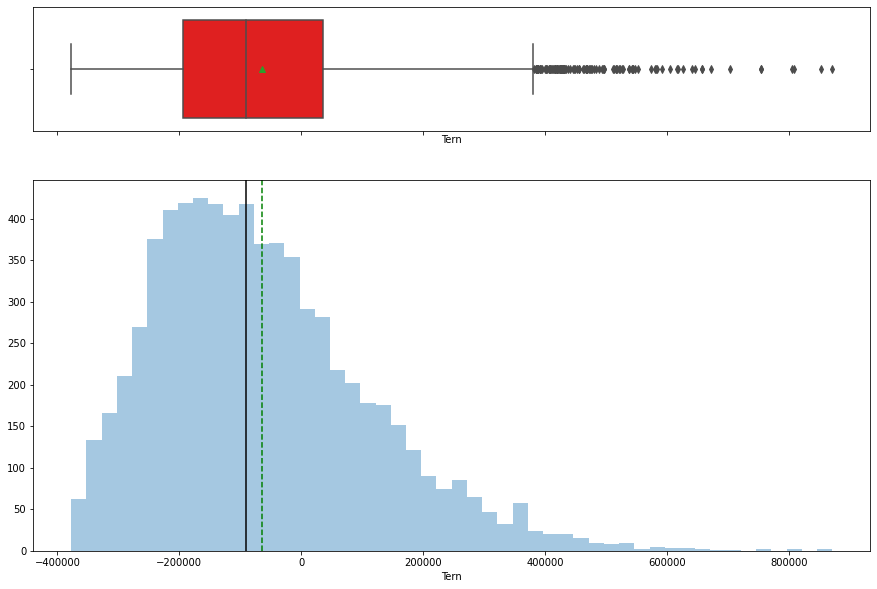

In [46]:
histogram_boxplot(data.Tern)

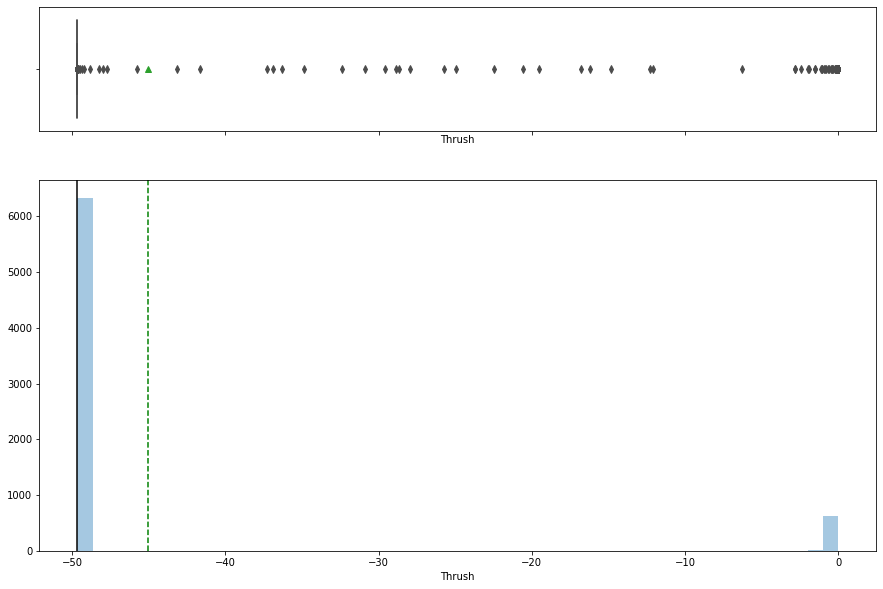

In [47]:
histogram_boxplot(data.Thrush)

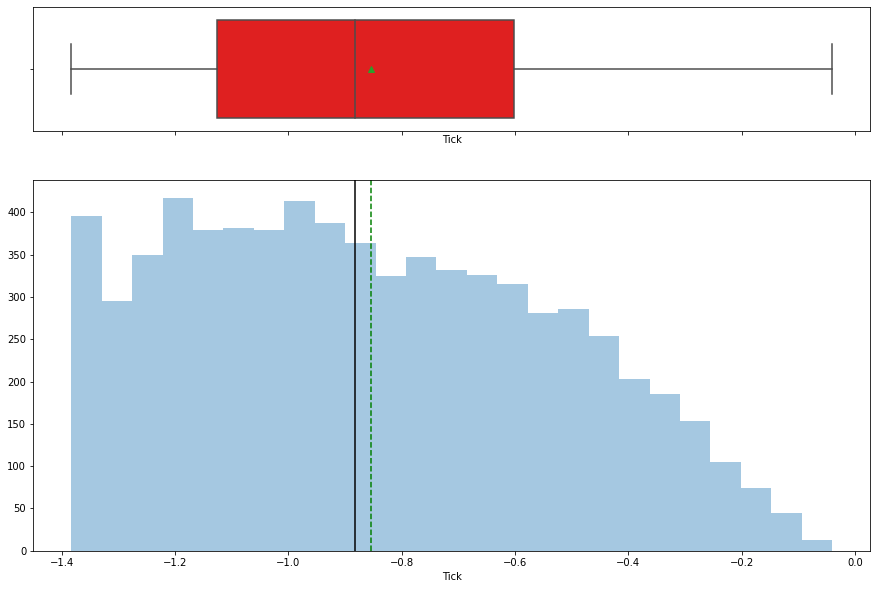

In [48]:
histogram_boxplot(data.Tick)

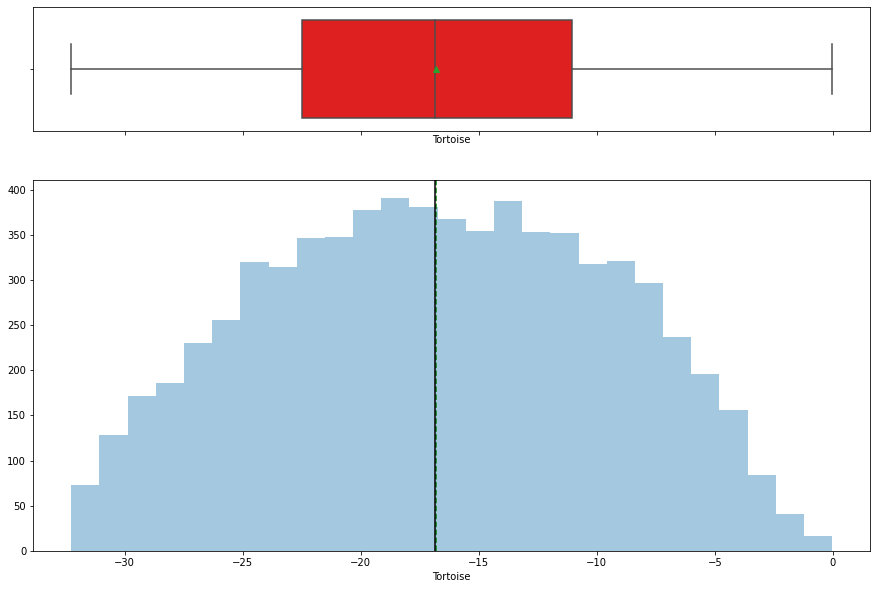

In [49]:
histogram_boxplot(data.Tortoise)

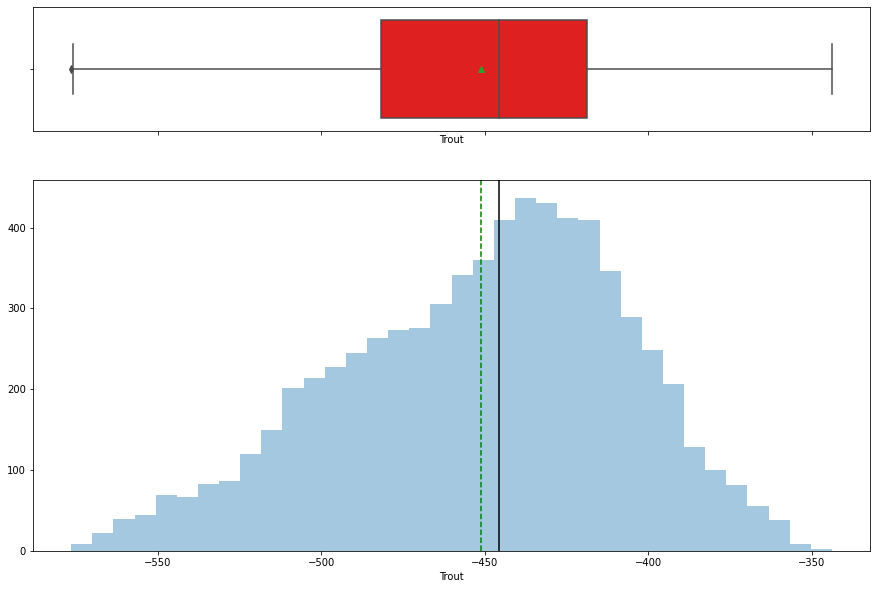

In [50]:
histogram_boxplot(data.Trout)

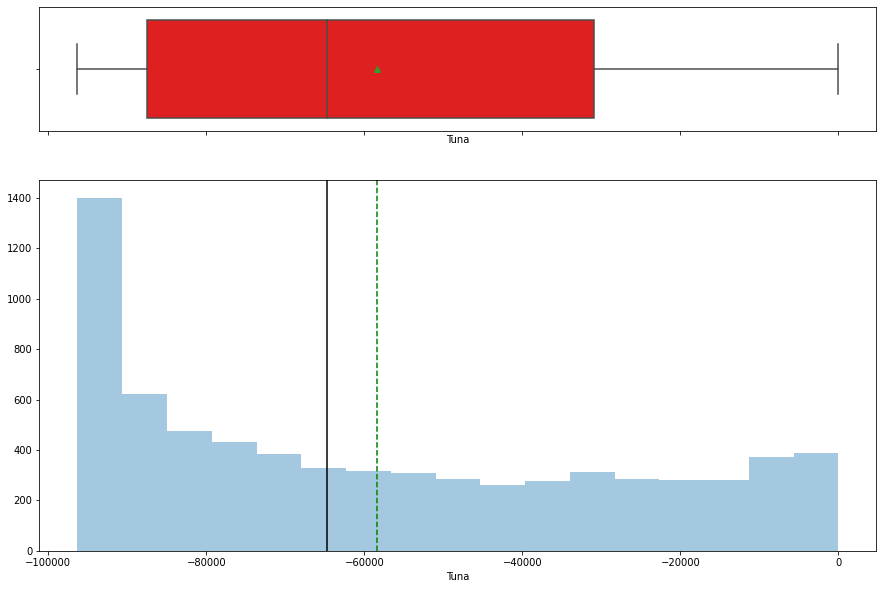

In [51]:
histogram_boxplot(data.Tuna)

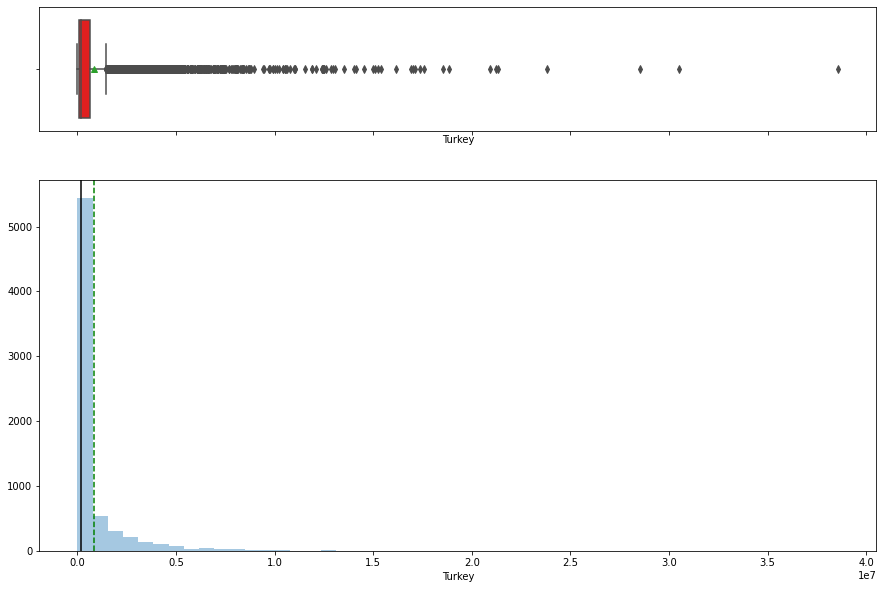

In [52]:
histogram_boxplot(data.Turkey)

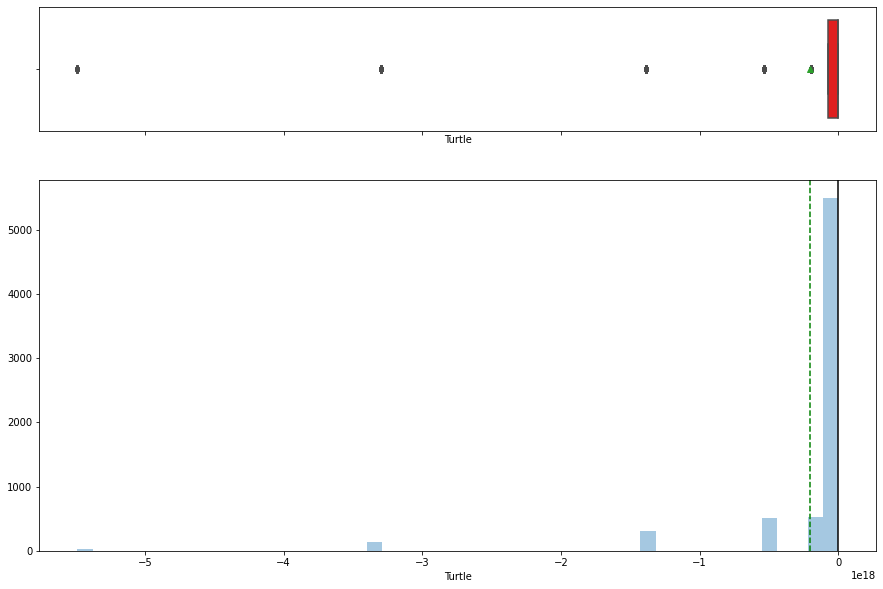

In [53]:
histogram_boxplot(data.Turtle)

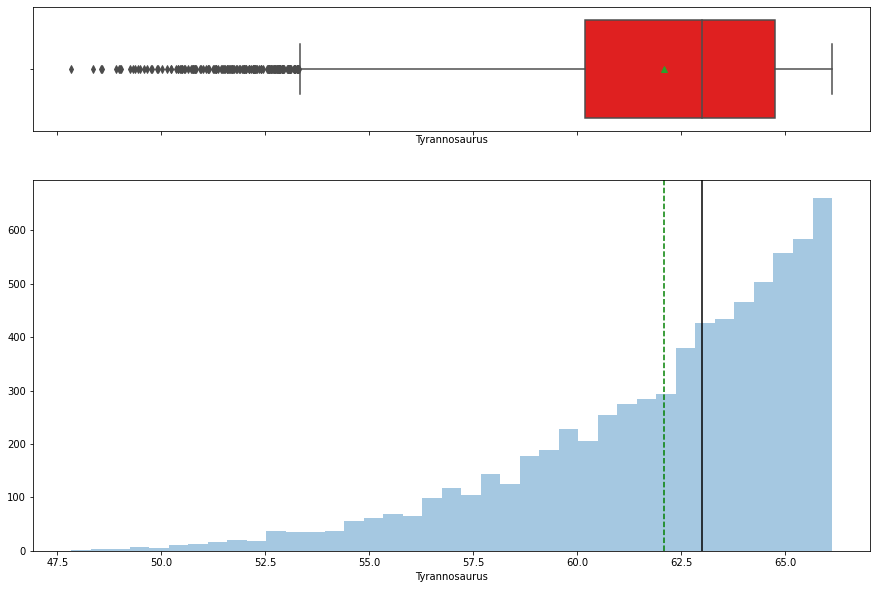

In [54]:
histogram_boxplot(data.Tyrannosaurus)

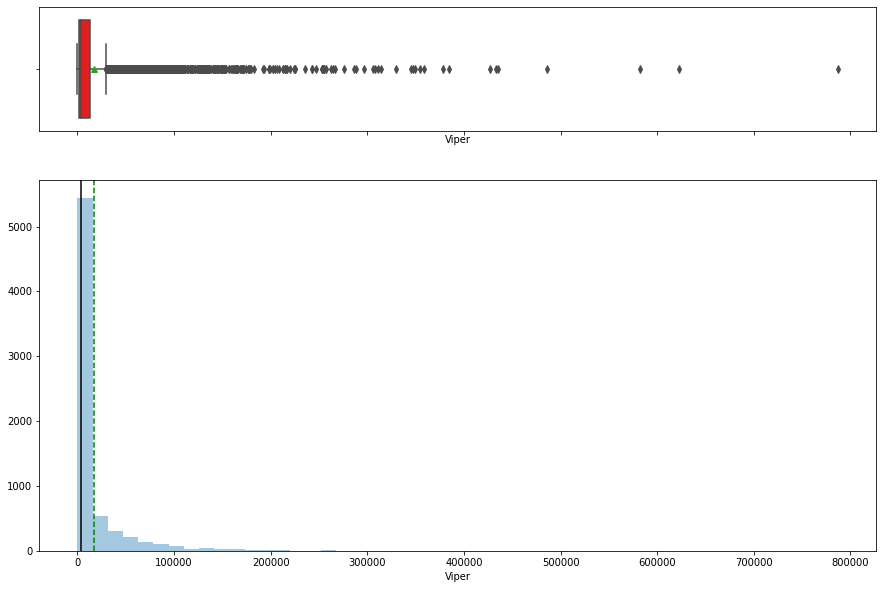

In [55]:
histogram_boxplot(data.Viper)

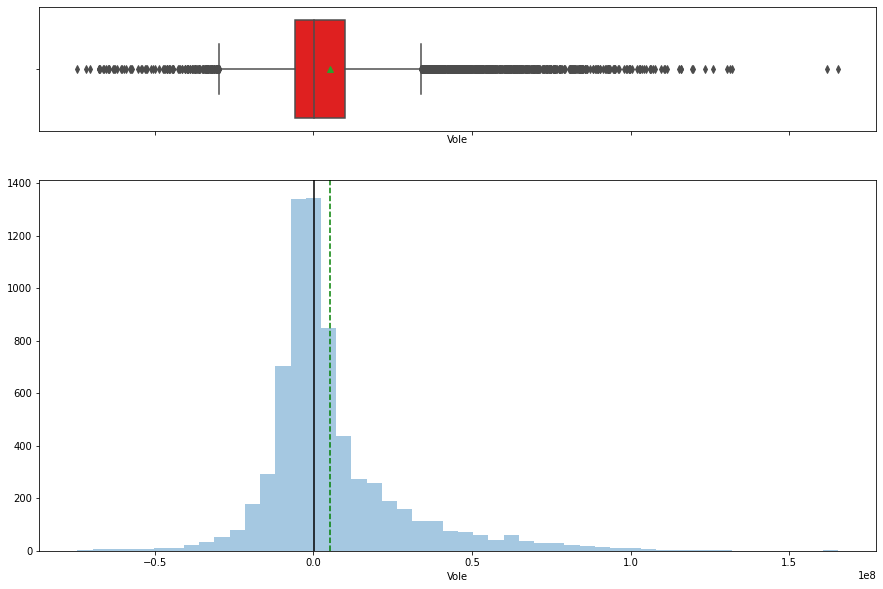

In [56]:
histogram_boxplot(data.Vole)

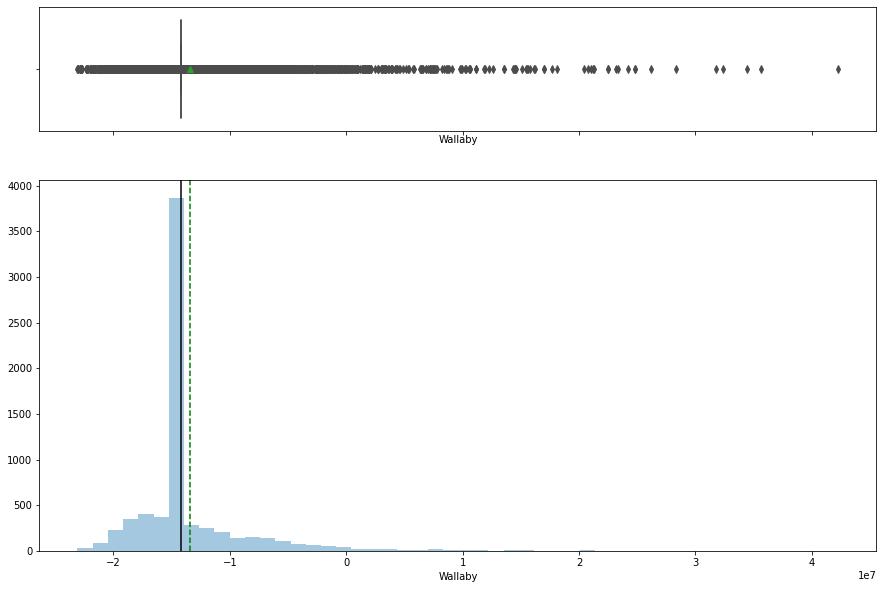

In [57]:
histogram_boxplot(data.Wallaby)

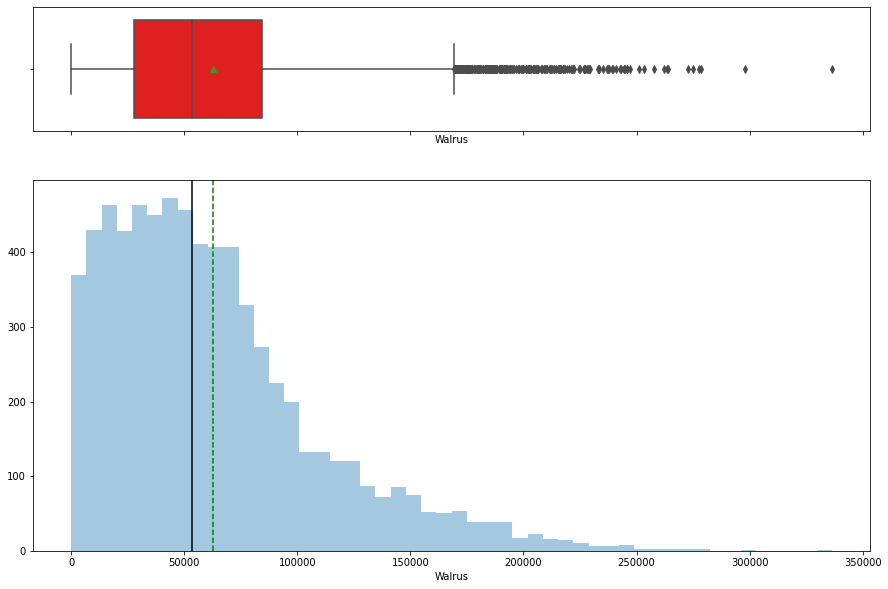

In [58]:
histogram_boxplot(data.Walrus)

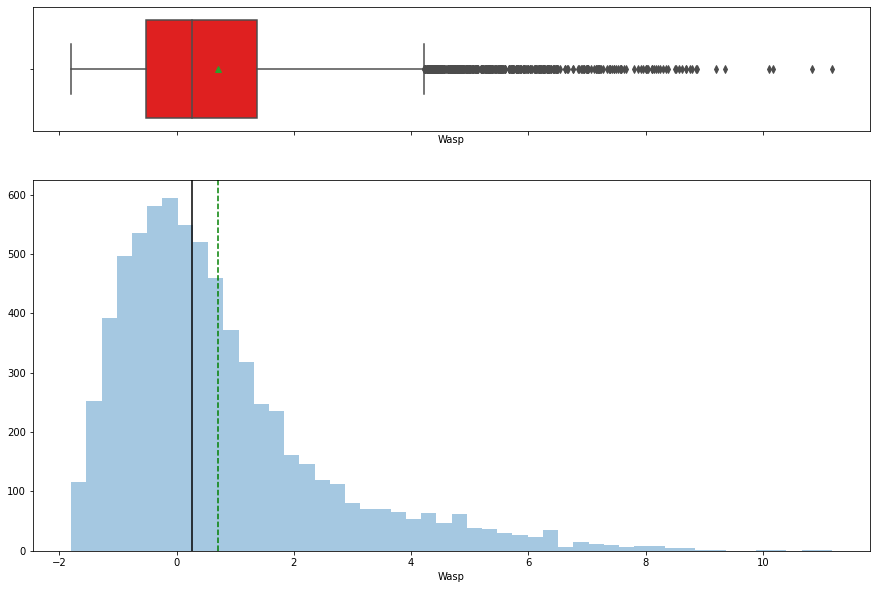

In [59]:
histogram_boxplot(data.Wasp)

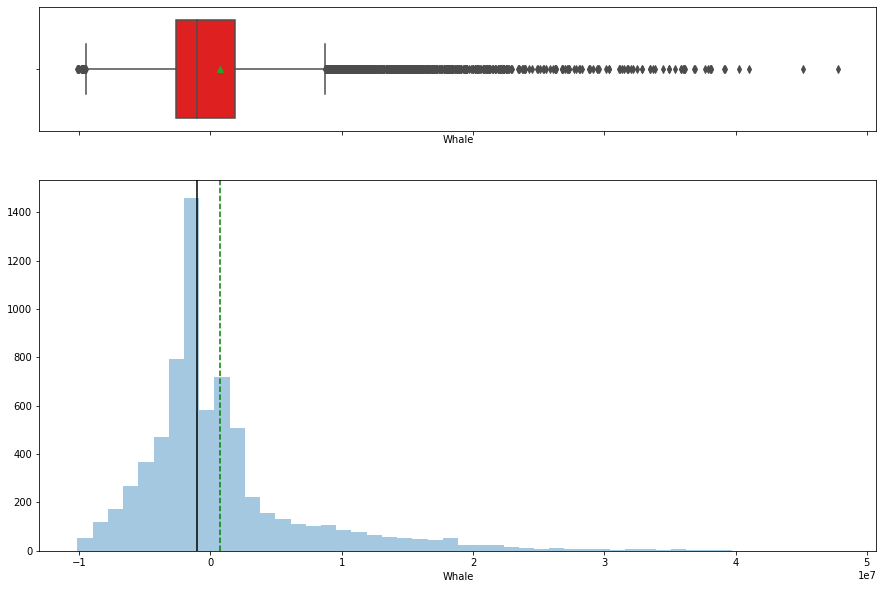

In [60]:
histogram_boxplot(data.Whale)

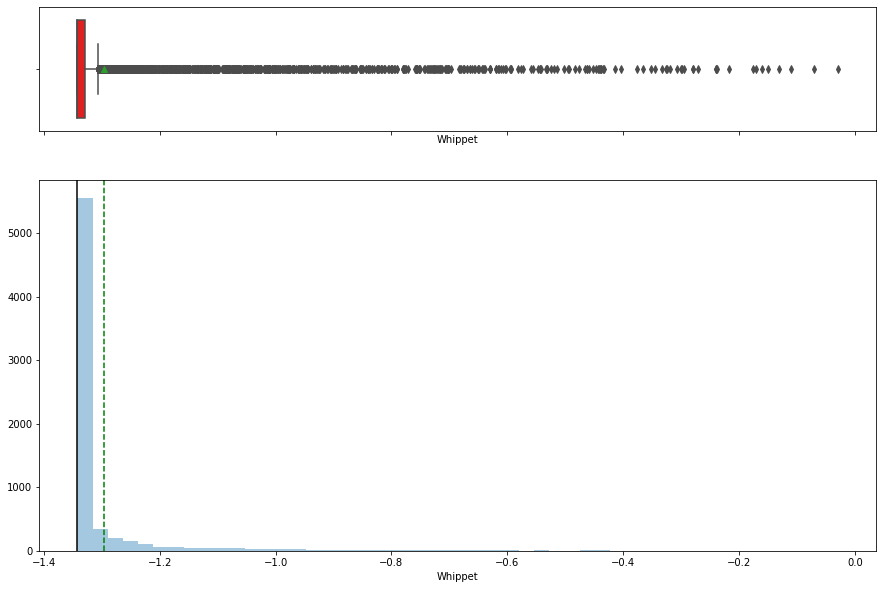

In [61]:
histogram_boxplot(data.Whippet)

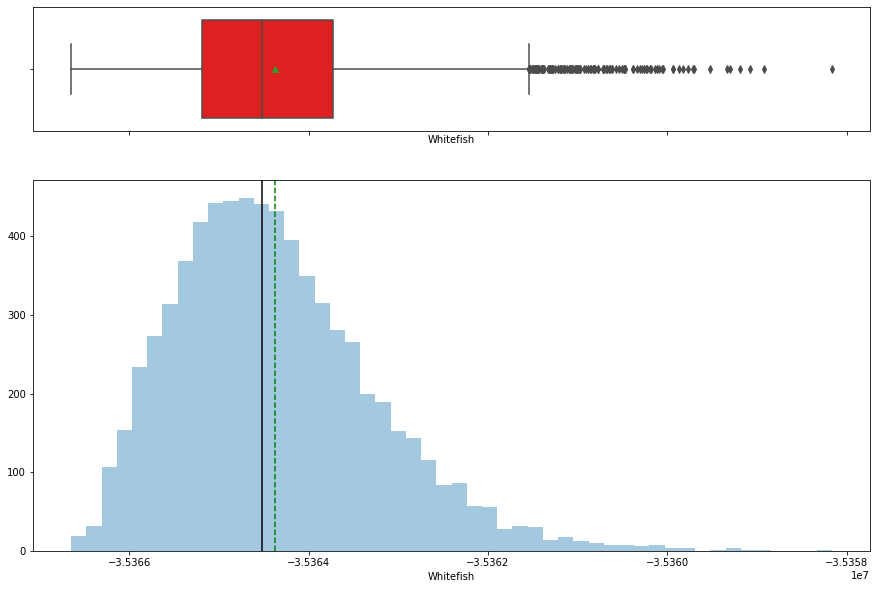

In [62]:
histogram_boxplot(data.Whitefish)

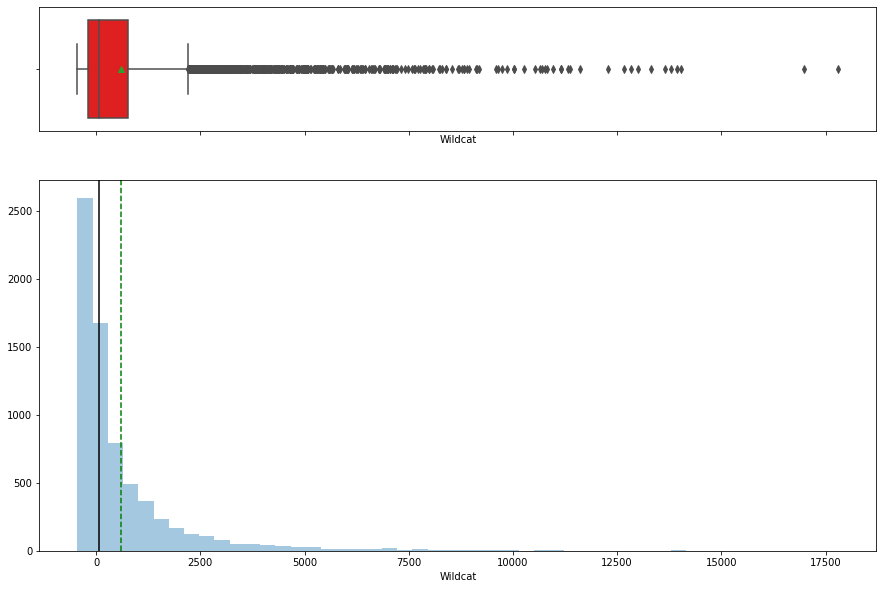

In [63]:
histogram_boxplot(data.Wildcat)

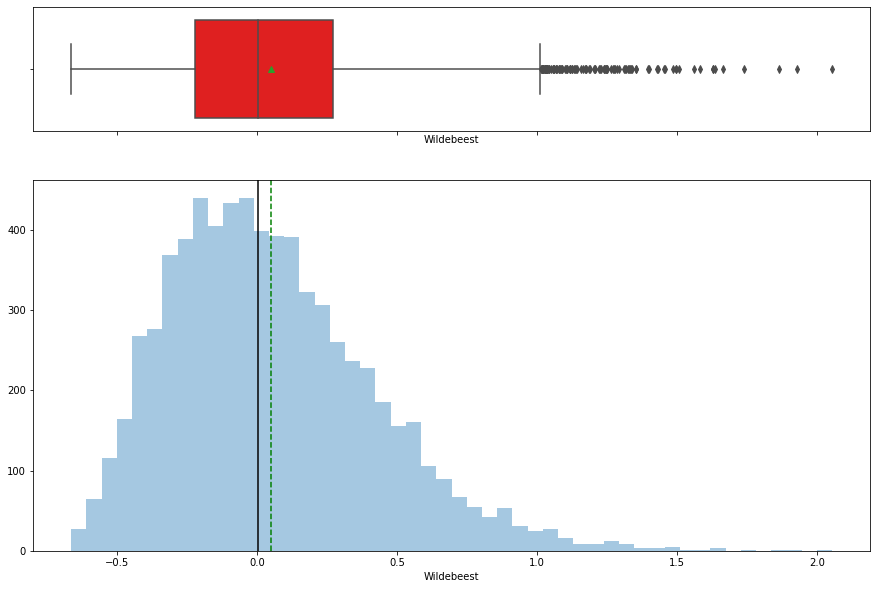

In [64]:
histogram_boxplot(data.Wildebeest)

Visualizing the Categorical variables.

In [65]:
def bar_perc(data, z):
    
    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (35, 5))
    
    # plt.xticks(rotation = 45)
    
    ax = sns.countplot(data[z], palette = 'Paired')
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        
        y = p.get_y() + p.get_height()                              # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 8)                  # Annotate the percentage 
        
    plt.show()                                                      # Display the plot

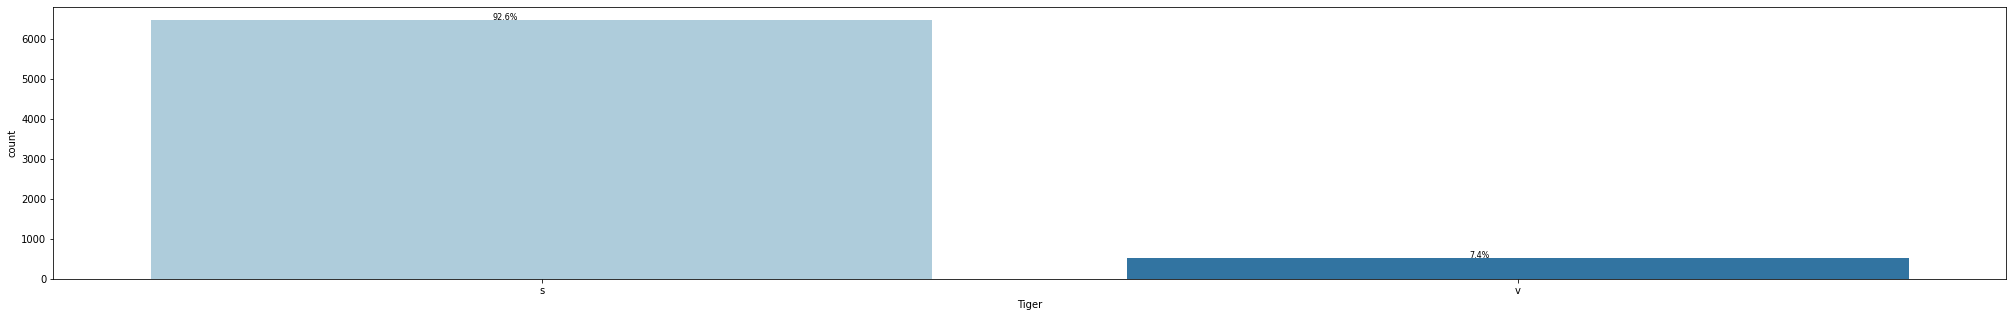

In [66]:
bar_perc(data, 'Tiger')

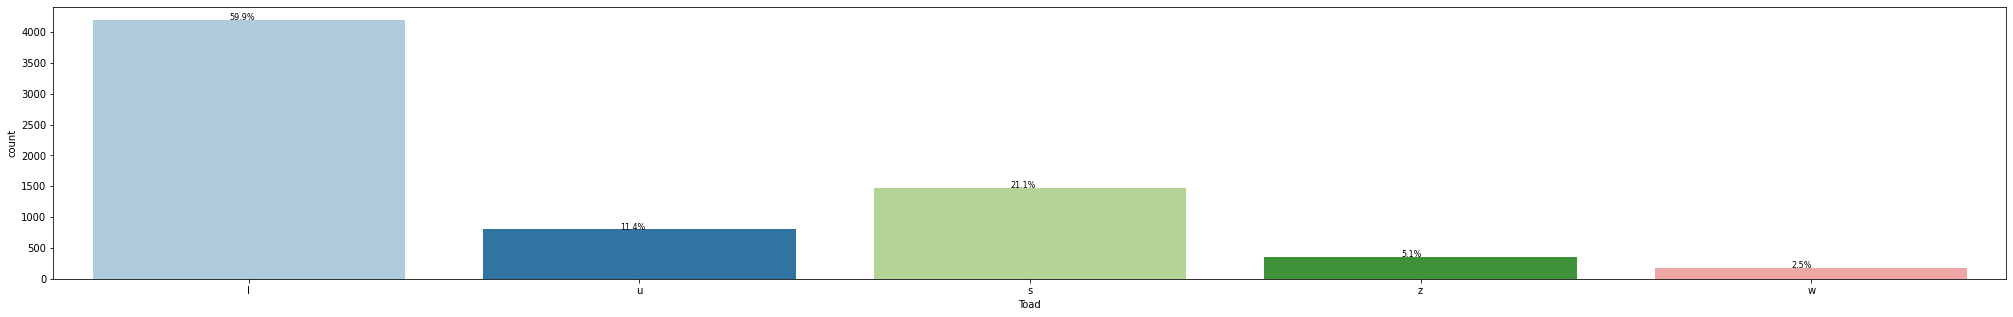

In [67]:
bar_perc(data, 'Toad')

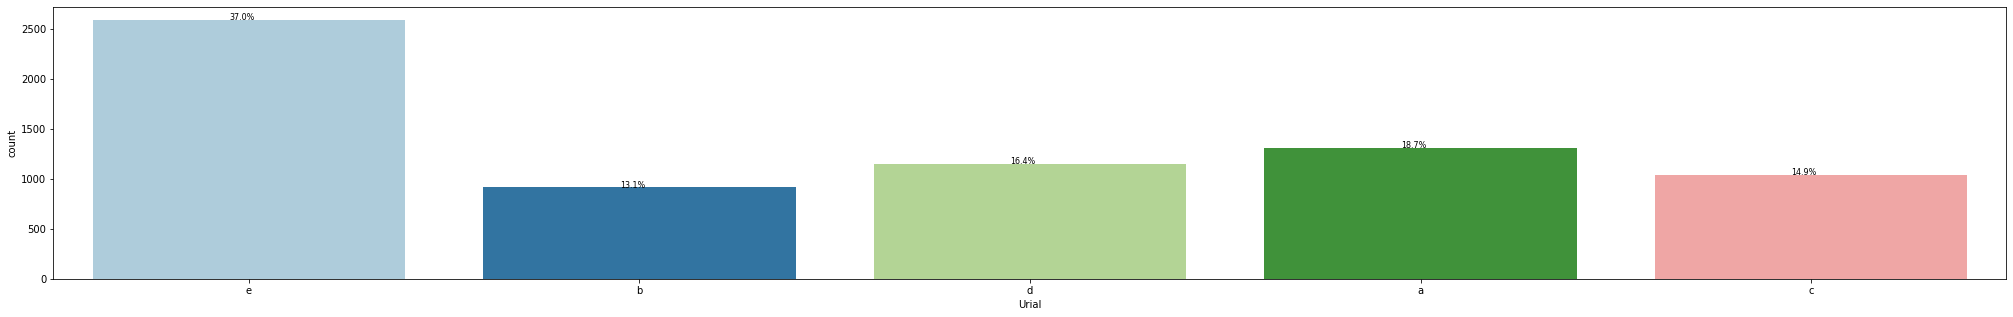

In [68]:
bar_perc(data, 'Urial')

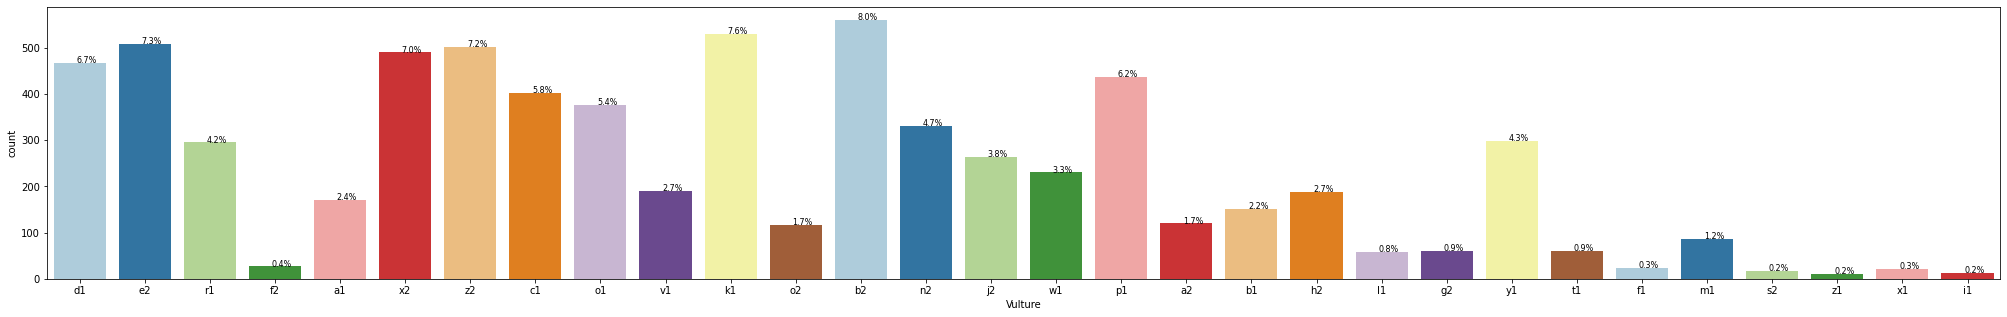

In [69]:
bar_perc(data, 'Vulture')

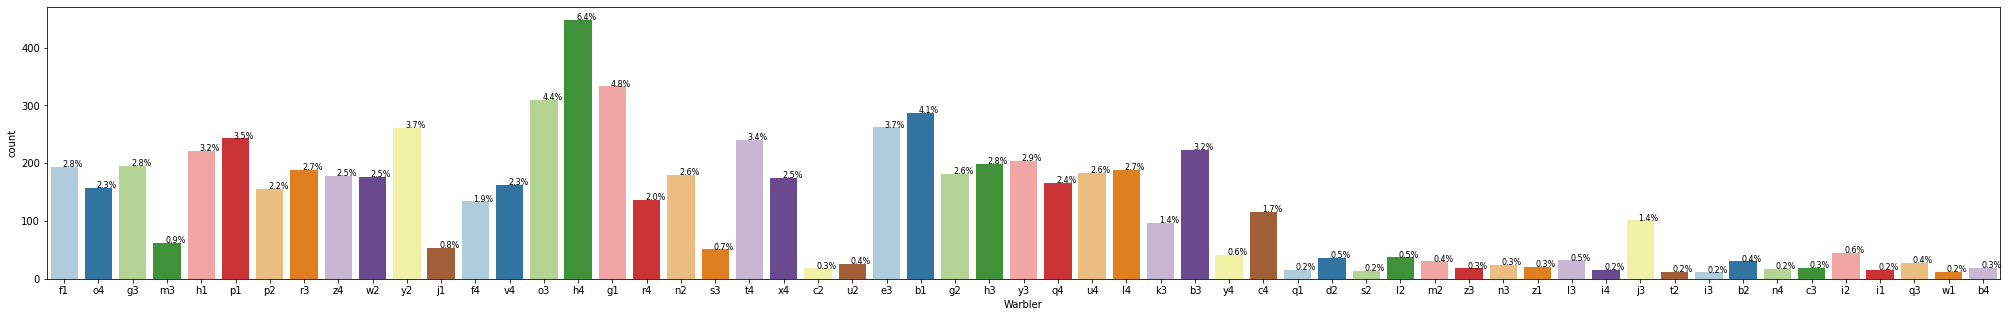

In [70]:
bar_perc(data, 'Warbler')

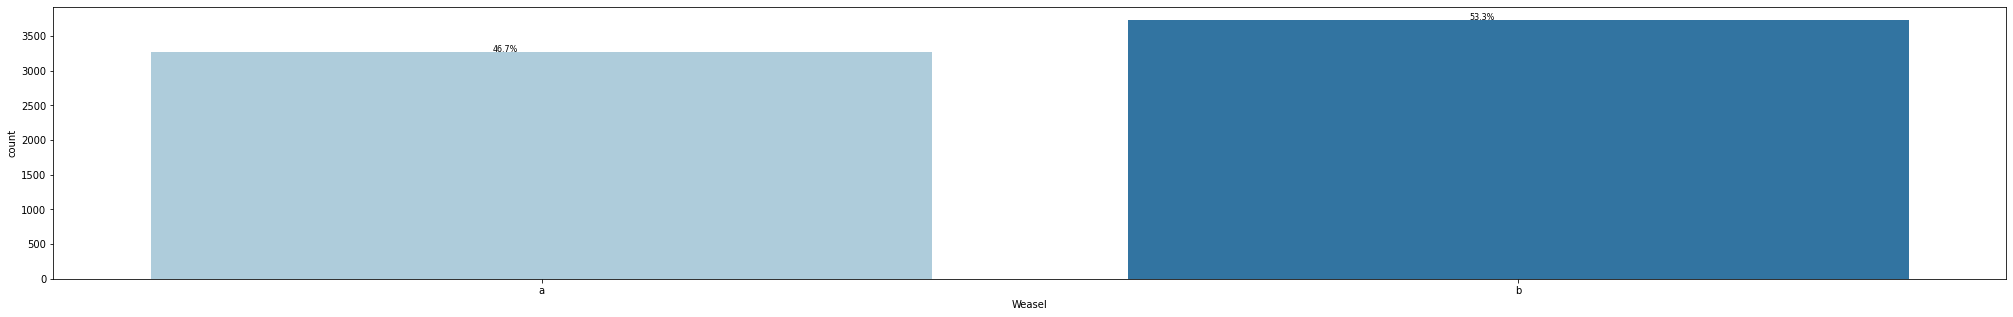

In [71]:
bar_perc(data, 'Weasel')

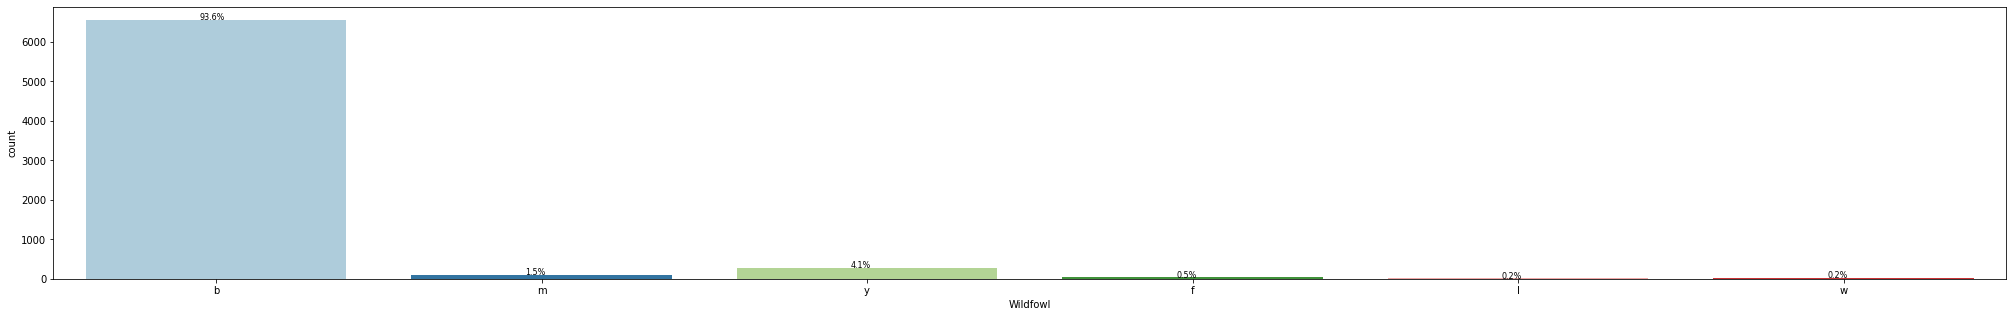

In [72]:
bar_perc(data, 'Wildfowl')

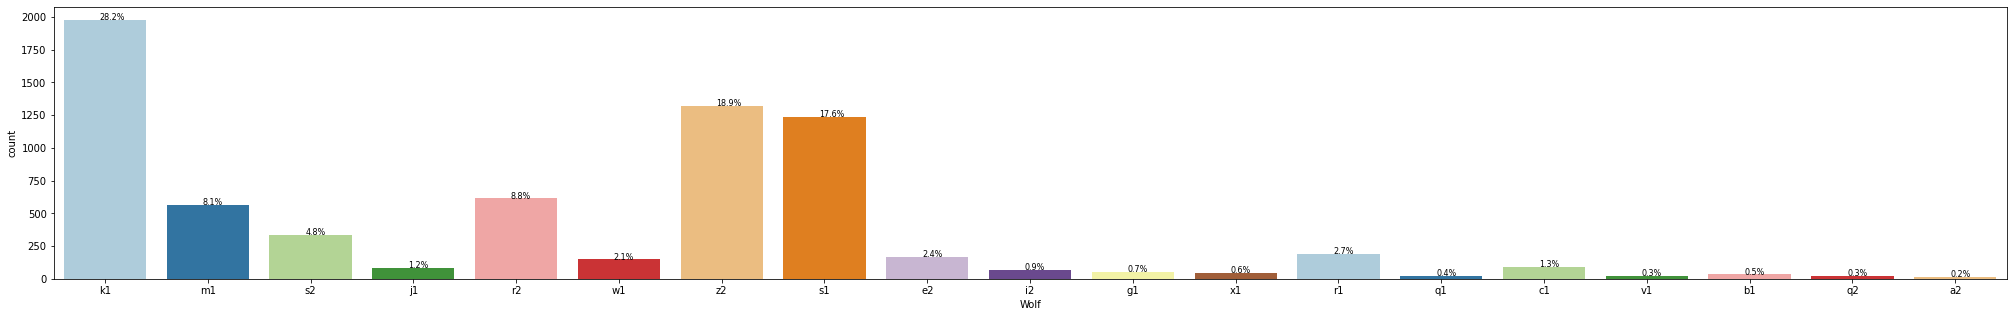

In [73]:
bar_perc(data, 'Wolf')

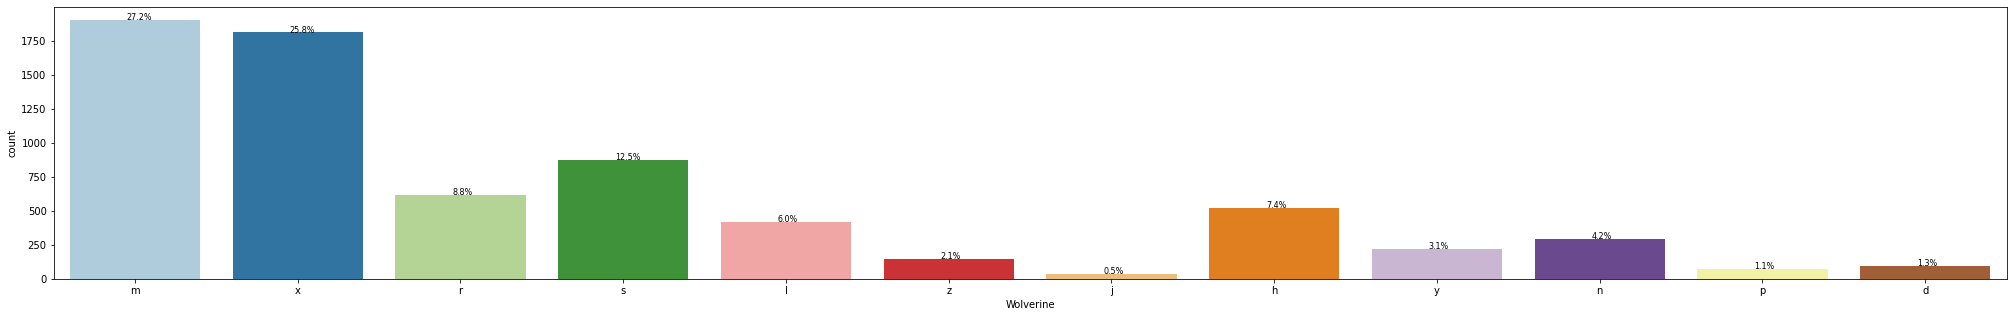

In [74]:
bar_perc(data, 'Wolverine')

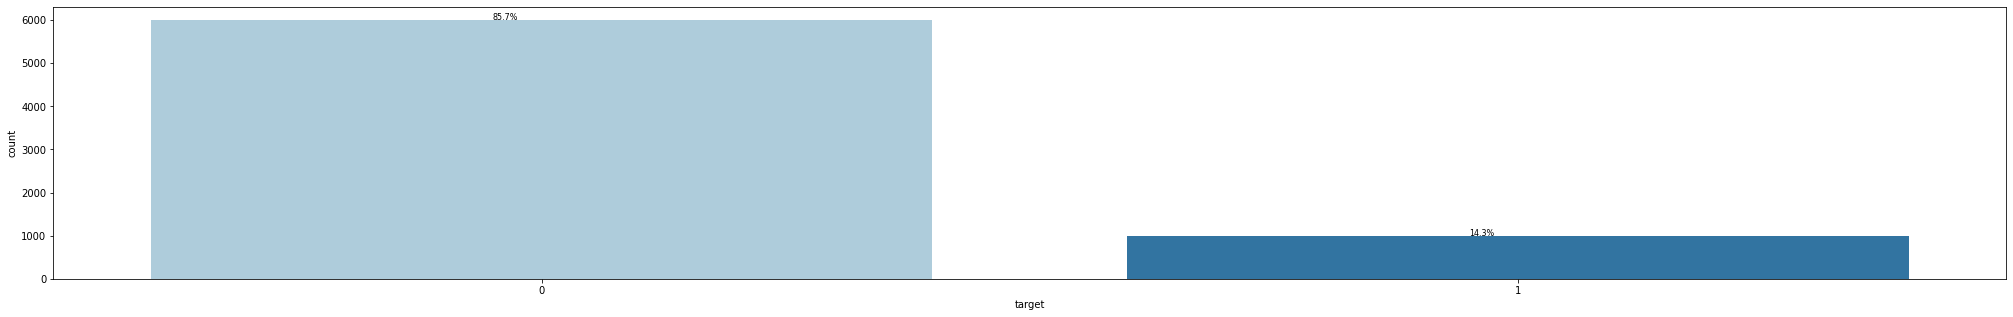

In [75]:
bar_perc(data, 'target')

Multivariate Analysis: Using Correlation

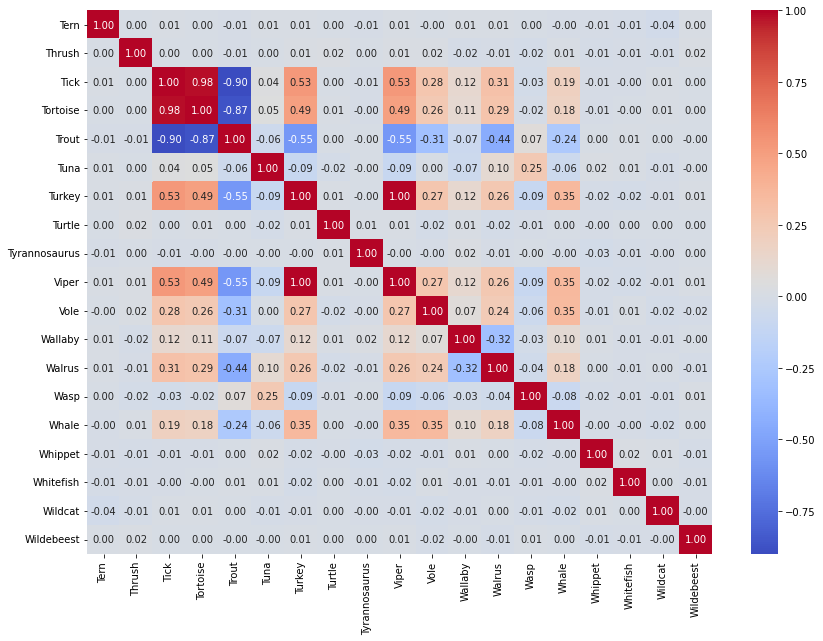

In [76]:
# Check for correlation among numerical variables

num_var = ['Tern', 'Thrush', 'Tick', 'Tortoise', 'Trout', 'Tuna', 'Turkey', 'Turtle', 
           'Tyrannosaurus', 'Viper', 'Vole', 'Wallaby', 'Walrus', 'Wasp', 'Whale', 'Whippet',
           'Whitefish', 'Wildcat', 'Wildebeest']

corr = data[num_var].corr()

# Plot the heatmap

plt.figure(figsize = (14, 10))

sns.heatmap(corr, annot = True, cmap = 'coolwarm',
            
        fmt = ".2f",
            
        xticklabels = corr.columns,
            
        yticklabels = corr.columns)



1.   Trout is seen to be highly negatively correlated with Tick and Tortoise.
2.   Viper has positive correlations with Tick and Tortoise but negatively correlated with Trout.
3.   Turkey is been observed to be positively correlated to Tick and Tortoise.





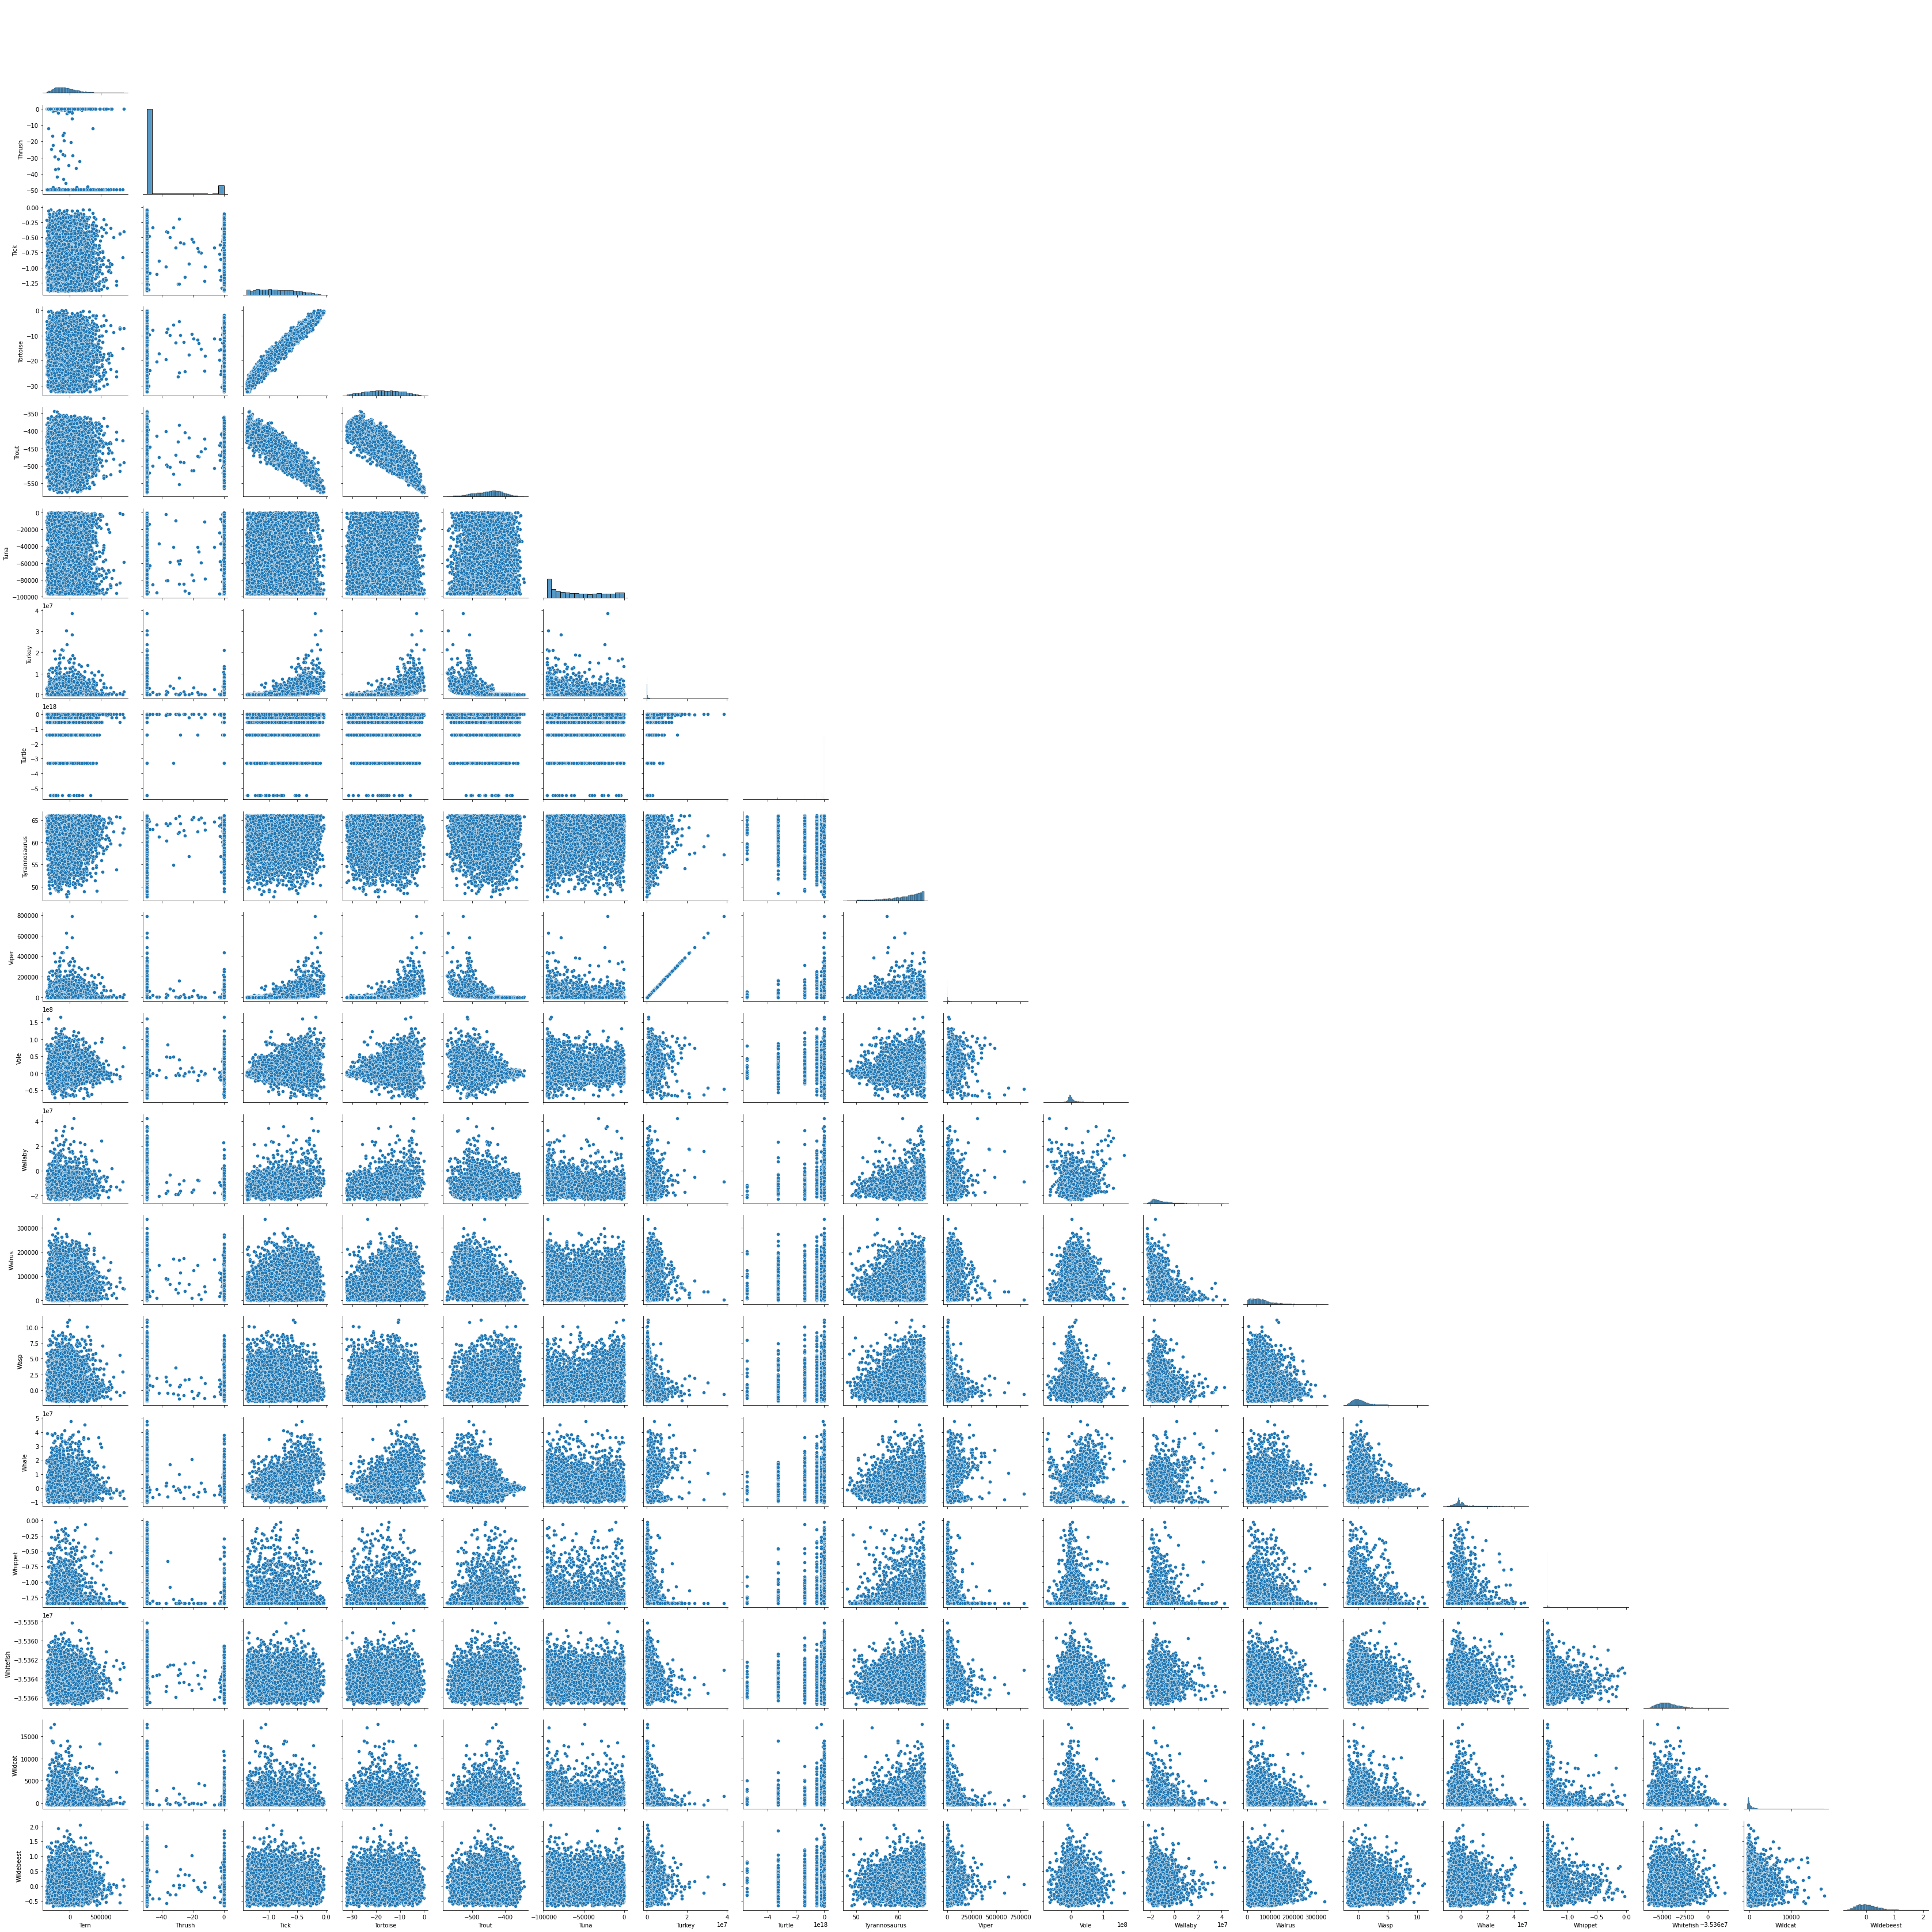

In [77]:
sns.pairplot(df[num_var], corner = True)

plt.show()

In [78]:
Y = data.target
X = data.drop(columns = ['target'])
test_actual_target = test.target
test_features= test.drop(columns= ['target'])
# test_actual_target = test.target

In [79]:
X.shape

(7003, 28)

In [80]:
test_features.shape

(1031, 28)

In [81]:
to_get_dummies_for = ['Tiger', 'Toad', 'Urial', 'Vulture', 'Warbler', 'Weasel', 'Wildfowl','Wolf',
            'Wolverine']
for i in to_get_dummies_for:
  X[i] = pd.factorize(X[i])[0]

In [82]:
X.head()

Tern     Thrush      Tick  Tiger  Toad   Tortoise       Trout  \
0 -253077.772390 -49.659246 -0.679765      0     0 -12.055165 -463.332642   
1  380192.123132 -49.659246 -1.356456      0     0 -30.235998 -388.822813   
2 -218627.876963 -49.659246 -0.542194      0     0 -10.443575 -519.014942   
3 -178076.879466 -49.659246 -0.485974      0     0  -8.374563 -504.614247   
4 -169250.190006 -49.659246 -0.600561      0     0 -10.269902 -455.225099   

           Tuna        Turkey        Turtle  ...  Warbler  Weasel  \
0 -41860.419322  3.256739e+05 -4.542838e+11  ...        0       0   
1 -94810.029959  1.154421e+03 -3.356728e+12  ...        1       1   
2 -46075.931683  2.248867e+06 -1.671217e+11  ...        2       0   
3 -73554.391505  1.452062e+07 -1.832696e+14  ...        3       0   
4 -41390.990681  2.689196e+05 -5.327237e+17  ...        4       0   

          Whale   Whippet     Whitefish      Wildcat  Wildebeest  Wildfowl  \
0 -3.297065e+06 -0.974495 -3.536578e+07  -395.159010    0.021952         0   
1 -1.043690e+06 -1.342061 -3.536549e+07   609.332121    0.269383         0   
2  4.892868e+06 -1.335934 -3.536456e+07  1175.536902    0.341417         0   
3  2.814345e+07 -1.073553 -3.536497e+07  -359.320759    0.003191         1   
4 -1.801627e+05 -1.341853 -3.536321e+07  -346.856580   -0.250332         0   

   Wolf  Wolverine  
0     0          0  
1     1          1  
2     2          2  
3     0          0  
4     3          3  

[5 rows x 28 columns]

In [83]:
for i in to_get_dummies_for:
  test_features[i] = pd.factorize(test_features[i])[0]

In [84]:
test_features.head()

Tern     Thrush      Tick  Tiger  Toad   Tortoise       Trout  \
0   10037.569173 -49.659246 -1.136071      0     0 -26.668479 -416.498726   
1  309793.427988 -49.659246 -0.405625      0     1  -9.135203 -504.070169   
2 -211799.890072 -49.659246 -1.264768      0     1 -33.497916 -369.689046   
3  126491.946464 -49.659246 -0.657188      0     1 -13.408124 -474.511672   
4 -263898.558134 -49.659246 -0.806868      0     0 -16.425848 -426.317969   

           Tuna        Turkey        Turtle  ...  Warbler  Weasel  \
0 -68609.347455  9.545921e+04 -3.680482e+15  ...        0       0   
1 -39477.100060  1.993753e+06 -1.671217e+11  ...        1       1   
2  -8971.914423  5.490111e+04 -3.356728e+12  ...        2       0   
3  -2781.100939  1.906031e+05 -2.261746e+10  ...        3       1   
4 -43766.391718  1.533545e+05 -6.148062e+10  ...        4       0   

          Whale   Whippet     Whitefish     Wildcat  Wildebeest  Wildfowl  \
0 -1.654323e+06 -1.342072 -3.528056e+07   64.911670   -0.314766         0   
1 -3.070990e+06 -1.340854 -3.528065e+07  -12.327810    0.836566         0   
2  2.571013e+05 -1.305239 -3.528212e+07  -65.275581    0.405433         0   
3 -3.562542e+06 -1.295844 -3.527862e+07 -131.275734    0.076052         0   
4 -1.329357e+06 -1.341364 -3.528261e+07  389.990411   -0.341824         0   

   Wolf  Wolverine  
0     0          0  
1     1          1  
2     2          0  
3     1          2  
4     2          3  

[5 rows x 28 columns]

In [85]:
# #  Creating the list of columns for which we need to create the dummy variables
# to_get_dummies_for = ['Tiger', 'Toad', 'Urial', 'Vulture', 'Warbler', 'Weasel', 'Wildfowl','Wolf',
#             'Wolverine']

# # Creating dummy variables
# test_features = pd.get_dummies(data=test_features, columns = to_get_dummies_for, drop_first = True)      

In [86]:
# # Creating dummy variables for the categorical variables
# train_fea = pd.get_dummies(X, drop_first = True)
# # test_fea = pd.get_dummies(test_features, drop_first= True)
# train_fea.head()

In [87]:
# Scaling the data
sc = StandardScaler()

train_fea_scaled = sc.fit_transform(X)
test_fea_scaled = sc.fit_transform(test_features)
train_fea_scaled = pd.DataFrame(train_fea_scaled, columns = X.columns)
test_fea_scaled = pd.DataFrame(test_fea_scaled, columns = test_features.columns)

In [88]:
train_fea_scaled

Tern    Thrush      Tick     Tiger      Toad  Tortoise     Trout  \
0    -1.075446 -0.322355  0.539319 -0.283507 -0.721512  0.652990 -0.281330   
1     2.537211 -0.322355 -1.551422 -0.283507 -0.721512 -1.846488  1.425060   
2    -0.878918 -0.322355  0.964363 -0.283507 -0.721512  0.874550 -1.556540   
3    -0.647584 -0.322355  1.138063 -0.283507 -0.721512  1.158995 -1.226742   
4    -0.597230 -0.322355  0.784030 -0.283507 -0.721512  0.898426 -0.095655   
...        ...       ...       ...       ...       ...       ...       ...   
6998 -1.039865 -0.322355 -1.009114 -0.283507 -0.721512 -1.248648  1.225042   
6999  0.181578 -0.322355  1.542626 -0.283507 -0.721512  1.463763 -1.228319   
7000 -0.053802 -0.322355 -0.044371 -0.283507 -0.721512  0.067342 -0.290555   
7001 -1.221184  1.964878  0.552990 -0.283507  0.192516  0.701246 -0.490821   
7002  2.265961 -0.322355 -1.528654 -0.283507 -0.721512 -1.577634  1.991766   

          Tuna    Turkey    Turtle  ...   Warbler    Weasel     Whale  \
0     0.533679 -0.268383  0.330010  ... -1.546928 -1.068759 -0.615907   
1    -1.175751 -0.441963  0.330005  ... -1.466075  0.935665 -0.271877   
2     0.397585  0.760304  0.330010  ... -1.385221 -1.068759  0.634478   
3    -0.489532  7.324278  0.329711  ... -1.304368 -1.068759  4.184227   
4     0.548834 -0.298740 -0.540888  ... -1.223515 -1.068759 -0.140039   
...        ...       ...       ...  ...       ...       ...       ...   
6998 -1.146474 -0.400741  0.330010  ... -1.061808  0.935665 -0.045375   
6999 -0.892170  1.370607  0.330010  ...  1.848913 -1.068759  1.756858   
7000 -1.223935 -0.390671  0.285599  ...  1.040379 -1.068759  0.262107   
7001  0.558295  0.079693 -1.933490  ... -0.414981 -1.068759 -1.072201   
7002 -0.785365 -0.403604 -0.540888  ... -0.253274  0.935665 -0.035613   

       Whippet  Whitefish   Wildcat  Wildebeest  Wildfowl      Wolf  Wolverine  
0     2.377196  -1.253901 -0.671947   -0.081928 -0.240641 -1.117579  -0.889597  
1    -0.336585  -0.990556  0.004229    0.594906 -0.240641 -0.852079  -0.545273  
2    -0.291347  -0.159054  0.385372    0.791951 -0.240641 -0.586579  -0.200950  
3     1.645843  -0.531924 -0.647823   -0.133247  1.650727 -1.117579  -0.889597  
4    -0.335052   1.043829 -0.639432   -0.826746 -0.240641 -0.321079   0.143374  
...        ...        ...       ...         ...       ...       ...        ...  
6998 -0.336665   0.702580 -0.298442   -0.947300 -0.240641 -0.055579  -0.545273  
6999 -0.336667   2.681880 -0.295727   -1.179313 -0.240641  0.740920   0.832021  
7000 -0.070217  -0.913035 -0.521749    0.269317 -0.240641  1.006420  -0.889597  
7001 -0.336244   0.684604 -0.451665   -0.224593 -0.240641 -0.055579   1.520668  
7002 -0.142500  -0.442169 -0.398014    0.500380 -0.240641  0.475420  -0.545273  

[7003 rows x 28 columns]

In [89]:
test_fea_scaled

Tern    Thrush      Tick     Tiger      Toad  Tortoise     Trout  \
0     0.425720 -0.331502 -1.060606 -0.322056 -0.589465 -1.158009  0.357179   
1     2.374085 -0.331502  1.317590 -0.322056  0.131458  1.109201 -1.573740   
2    -1.016188 -0.331502 -1.479620 -0.322056  0.131458 -2.041116  1.389316   
3     1.182655 -0.331502  0.498545 -0.322056  0.131458  0.556674 -0.921986   
4    -1.354821 -0.331502  0.011217 -0.322056 -0.589465  0.166455  0.140668   
...        ...       ...       ...       ...       ...       ...       ...   
1026  2.323568 -0.331502  1.581120 -0.322056  0.852382  1.362807 -1.094848   
1027 -0.306463 -0.331502  0.401651 -0.322056  0.852382  0.518077 -0.109270   
1028  0.696118 -0.331502 -0.520765  3.702664  0.131458 -0.724510  0.409674   
1029  0.142764 -0.331502 -1.441307 -0.322056 -0.589465 -1.521307  1.895870   
1030 -0.544099 -0.331502 -1.241249 -0.322056 -0.589465 -1.485932  0.520517   

          Tuna    Turkey    Turtle  ...   Warbler    Weasel     Whale  \
0    -0.596261 -0.354751  0.314012  ... -1.285866 -0.866270 -0.457937   
1     0.272133  0.479089  0.320311  ... -1.219320  1.154374 -0.712660   
2     1.181453 -0.372566  0.320306  ... -1.152775 -0.866270 -0.114253   
3     1.365993 -0.312958  0.320311  ... -1.086229  1.154374 -0.801044   
4     0.144275 -0.329320  0.320311  ... -1.019683 -0.866270 -0.399506   
...        ...       ...       ...  ...       ...       ...       ...   
1026 -1.198897  1.125600  0.320296  ...  1.309425  1.154374  2.700459   
1027  0.903299 -0.053885  0.320311  ... -1.019683  1.154374 -1.036483   
1028 -1.271704 -0.352044  0.319459  ...  0.377782 -0.866270 -0.382657   
1029 -0.807272 -0.384105  0.320269  ... -0.287677 -0.866270 -0.002662   
1030  1.083271 -0.364087 -0.591473  ...  2.107977 -0.866270 -0.378262   

       Whippet  Whitefish   Wildcat  Wildebeest  Wildfowl      Wolf  Wolverine  
0    -0.344977   0.877625 -0.317508   -1.021293 -0.158063 -0.944924  -0.950193  
1    -0.335964   0.787538 -0.373782    2.297921 -0.158063 -0.682827  -0.603169  
2    -0.072386  -0.714296 -0.412358    1.054992 -0.158063 -0.420729  -0.950193  
3    -0.002859   2.855779 -0.460443    0.105410 -0.158063 -0.682827  -0.256145  
4    -0.339737  -1.209519 -0.080668   -1.099298 -0.158063 -0.420729   0.090879  
...        ...        ...       ...         ...       ...       ...        ...  
1026 -0.344978  -0.547939 -0.537966   -0.780418 -0.158063 -0.682827   0.437903  
1027 -0.254309  -0.726922 -0.494984   -0.812347 -0.158063  0.627662   1.826000  
1028 -0.344978   2.397318  0.099891    0.968362 -0.158063 -0.420729   0.090879  
1029  3.427371   0.092814 -0.352277    0.470095 -0.158063 -0.682827  -0.950193  
1030 -0.341840  -0.061855 -0.295027   -0.201998 -0.158063  0.103466  -0.950193  

[1031 rows x 28 columns]

In [90]:
x_train, x_val, y_train, y_val = train_test_split(train_fea_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['0','1'], yticklabels = ['0','1'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')
    
    plt.show()

In [93]:
# Fitting the logistic regression model
lg = LogisticRegression()

lg.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4202
           1       0.87      0.75      0.81       700

    accuracy                           0.95      4902
   macro avg       0.92      0.87      0.89      4902
weighted avg       0.95      0.95      0.95      4902



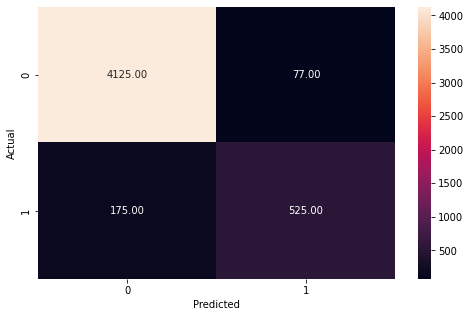

In [94]:
# Checking the performance on the training data
y_pred_train = lg.predict(x_train)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1801
           1       0.84      0.68      0.75       300

    accuracy                           0.94      2101
   macro avg       0.89      0.83      0.86      2101
weighted avg       0.93      0.94      0.93      2101



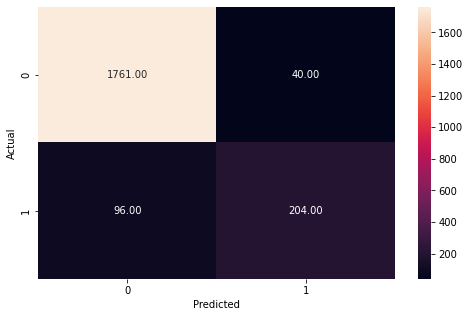

In [95]:
# Checking the performance on the test dataset
y_pred_val = lg.predict(x_val)
metrics_score(y_val, y_pred_val)

              precision    recall  f1-score   support

           0       0.58      0.95      0.72       543
           1       0.80      0.23      0.36       488

    accuracy                           0.61      1031
   macro avg       0.69      0.59      0.54      1031
weighted avg       0.68      0.61      0.55      1031



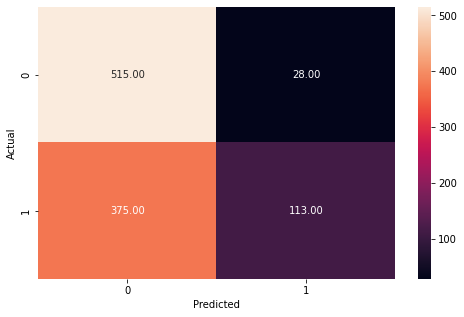

In [96]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(test_fea_scaled)
metrics_score(test_actual_target, y_pred_test)

In [97]:
results=pd.DataFrame(y_pred_test)

In [98]:
results.to_csv('/content/drive/MyDrive/PAYTM_MLE/PAYTM_take_home_assign/results.csv')

In [99]:
from xgboost import XGBClassifier

In [100]:
xgb = XGBClassifier(n_estimators= 100)

In [101]:

xgb.fit(x_train,y_train)

XGBClassifier()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4202
           1       0.93      0.84      0.88       700

    accuracy                           0.97      4902
   macro avg       0.95      0.91      0.93      4902
weighted avg       0.97      0.97      0.97      4902



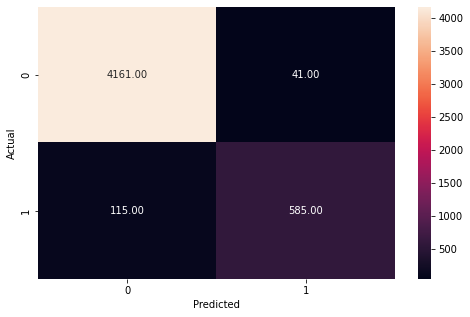

In [102]:
# Checking the performance on the training data
y_pred_train_xgb = xgb.predict(x_train)

metrics_score(y_train, y_pred_train_xgb)

              precision    recall  f1-score   support

           0       0.62      0.91      0.74       543
           1       0.78      0.38      0.51       488

    accuracy                           0.66      1031
   macro avg       0.70      0.64      0.62      1031
weighted avg       0.70      0.66      0.63      1031



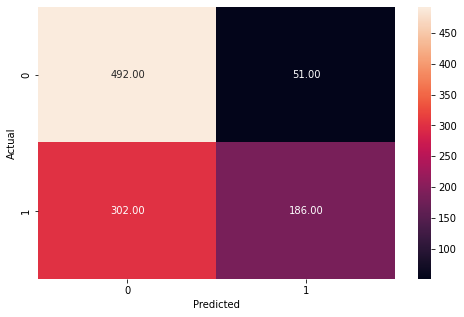

In [103]:
# Checking the performance on the test dataset
y_pred_test_xgb = xgb.predict(test_fea_scaled)
metrics_score(test_actual_target, y_pred_test_xgb)

The model is overfitting as we see that the accuracy is 97% on the training data whereas it is 66% on the test data. It is seen that the data provided needs more samples for better results.